# Hotayi Assignment Testing

/content/drive/MyDrive/DataScienceAssignment/MC2_2020_08.csv

# **Import Relevant Library & Dataset**

In [ ]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator

#Classification Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import precision_score,accuracy_score,recall_score,classification_report,f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Import Dataset

In [1]:
import pandas as pd

#WEN ZHI FILE PATH
hotayiData=pd.read_csv('MC2_2020_08.csv')
hotayiData=hotayiData.drop('Unnamed: 0',axis=1)

#YI HONG FILE PATH
#hotayiData=pd.read_csv('/content/drive/MyDrive/Data Science Y3S1/C_Result_2020_08.csv')

#BENJAMIN FILE PATH
#hotayiData=pd.read_csv('/content/drive/MyDrive/DEGREE ;(/Data Science/C_Result_2020_08.csv')

#SIONG HOU FILE PATH
#hotayiData=pd.read_csv('/content/drive/MyDrive/Y3S1_DataScience_Dataset/C_Result_2020_08.csv')

print('Training data shape: ', hotayiData.shape)
hotayiData


Training data shape:  (313337, 13)


,Part,IC 2D,Lot,Date,Time,Machine,Server result,Machine result,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5
0,791-00529,1,P 8 7,8/1/2020,8:38:33,PA05-1901,OK,OK,14.7,9.9,118.7,66.3,88.1
1,791-00529,1,P 8 7,8/1/2020,8:43:21,PA05-1901,OK,NG,12.4,5.9,14.2,279.9,288.6
2,791-00529,1,P 8 7,8/1/2020,8:46:05,PA05-1901,OK,OK,36.4,16.5,-39.5,40.3,74.8
3,791-00529,1,P 8 7,8/1/2020,12:43:41,PA05-1901,OK,OK,7.9,2.9,51.0,27.9,-15.5
4,791-00529,10,P 8 7,8/1/2020,8:46:34,PA05-1901,OK,NG,-3.8,-0.2,30.0,200.7,203.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313332,791-00529,6404,P 8 7,8/30/2020,6:37:52,PA05-1901,OK,OK,-1520.0,-1516.6,NaN,NaN,NaN
313333,791-00529,6405,P 8 7,8/30/2020,6:37:52,PA05-1901,OK,OK,-1538.7,-1450.2,NaN,NaN,NaN
313334,791-00529,6406,P 8 7,8/30/2020,6:37:52,PA05-1901,OK,OK,-1539.9,-1459.4,NaN,NaN,NaN
313335,791-00529,6407,P 8 7,8/30/2020,6:37:52,PA05-1901,OK,OK,-1462.4,-1391.4,NaN,NaN,NaN


#**Data Understanding**


In [ ]:
machineResult = hotayiData['Machine result'].value_counts()

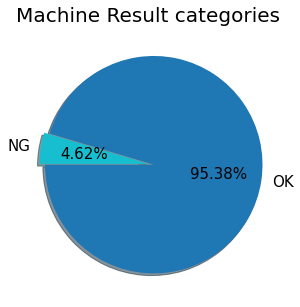

In [ ]:
plt.figure(figsize=(5,5)) 
machineResult.plot.pie(autopct = '%1.2f%%', shadow = True, explode = (0.05,0), cmap = 'tab10',startangle = 180, fontsize = 15)
plt.title('Machine Result categories',fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()

## Result based on week of day

In [ ]:

hotayiDf=hotayiData.copy()

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hotayiDf['DayofWeek'] = pd.to_datetime(hotayiDf['Date']).dt.day_name()
hotayiDf.head()


,Part,IC 2D,Lot,Date,Time,Machine,Server result,Machine result,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5,DayofWeek
0,791-00529,1,P 8 7,8/1/2020,8:38:33,PA05-1901,OK,OK,14.7,9.9,118.7,66.3,88.1,Saturday
1,791-00529,1,P 8 7,8/1/2020,8:43:21,PA05-1901,OK,NG,12.4,5.9,14.2,279.9,288.6,Saturday
2,791-00529,1,P 8 7,8/1/2020,8:46:05,PA05-1901,OK,OK,36.4,16.5,-39.5,40.3,74.8,Saturday
3,791-00529,1,P 8 7,8/1/2020,12:43:41,PA05-1901,OK,OK,7.9,2.9,51.0,27.9,-15.5,Saturday
4,791-00529,10,P 8 7,8/1/2020,8:46:34,PA05-1901,OK,NG,-3.8,-0.2,30.0,200.7,203.3,Saturday


In [ ]:
hotayiDf.groupby(["DayofWeek", "Machine result"])["Machine result"].count() 

DayofWeek  Machine result
Friday     NG                 3164
           OK                44073
Monday     NG                  565
           OK                33596
Saturday   NG                 3844
           OK                39953
Sunday     NG                  929
           OK                15758
Thursday   NG                 1428
           OK                50398
Tuesday    NG                 1842
           OK                57953
Wednesday  NG                 2703
           OK                57131
Name: Machine result, dtype: int64

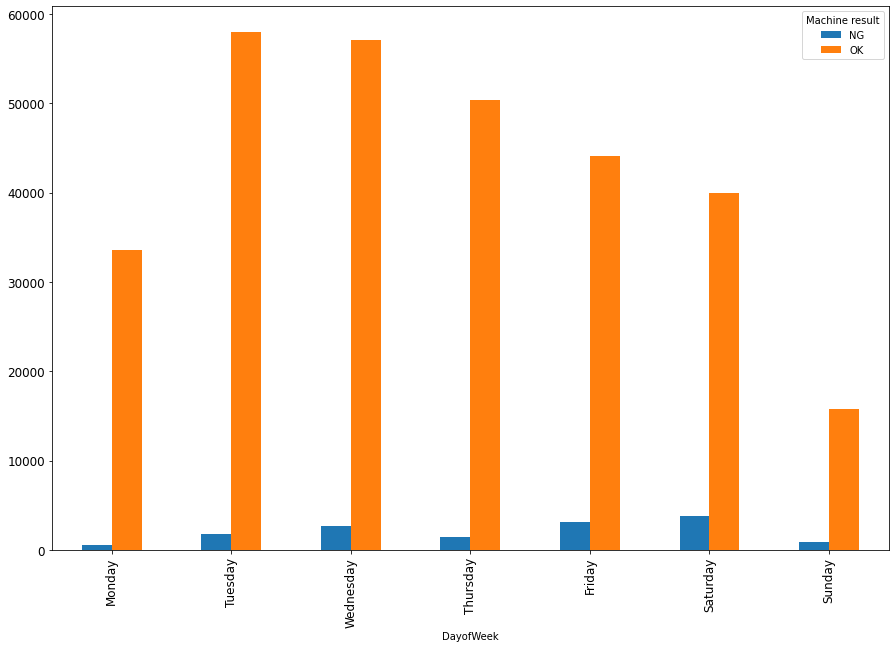

In [ ]:
hotayiDf.groupby(['DayofWeek'])['Machine result'].value_counts().unstack().reindex(cats).plot.bar(figsize=(15,10),fontsize=12,width=0.5)

(0.0, 24.0)

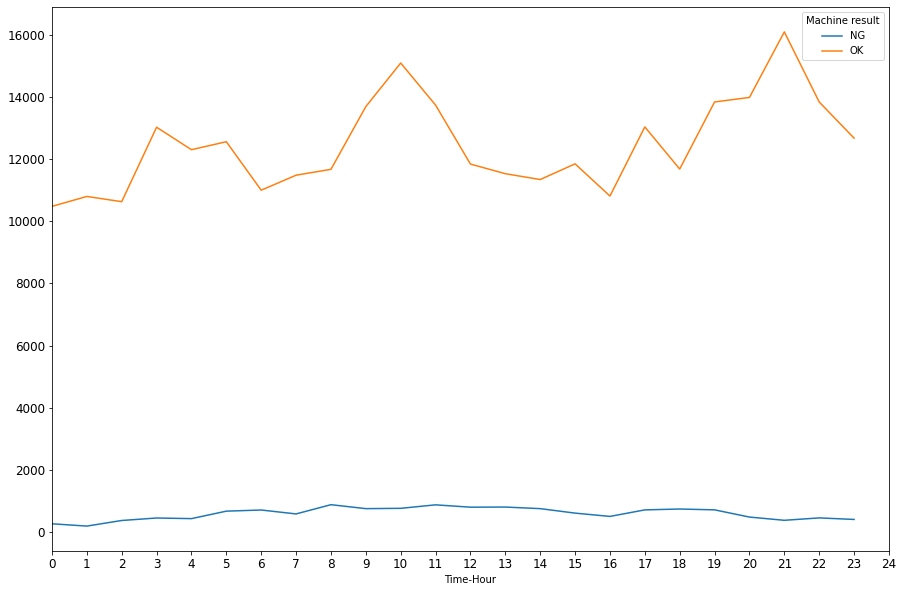

In [ ]:
from matplotlib.pyplot import MultipleLocator
hourSeries=hotayiDf.copy()
hourSeries=hourSeries.drop({'Part', 'IC 2D', 'Lot', 'Date','Machine','Server result', '(um)Point1', '(um)Point2', '(um)Point3',
       '(um)Point4', '(um)Point5','DayofWeek'},axis=1)
hourSeries['Time']=pd.to_datetime(hourSeries['Time'])
x_locator=MultipleLocator(1)
graph=hourSeries.groupby(hourSeries['Time'].dt.hour)['Machine result'].value_counts().unstack().plot(kind='line',figsize=(15,10),fontsize=12,xlabel='Time-Hour')
graph.xaxis.set_major_locator(x_locator)
plt.xlim(0,24)


In [ ]:
hotayiDf.columns

Index(['Part', 'IC 2D', 'Lot', 'Date', 'Time', 'Machine', 'Server result',
       'Machine result', '(um)Point1', '(um)Point2', '(um)Point3',
       '(um)Point4', '(um)Point5', 'DayofWeek'],
      dtype='object')

Detecting Outliers

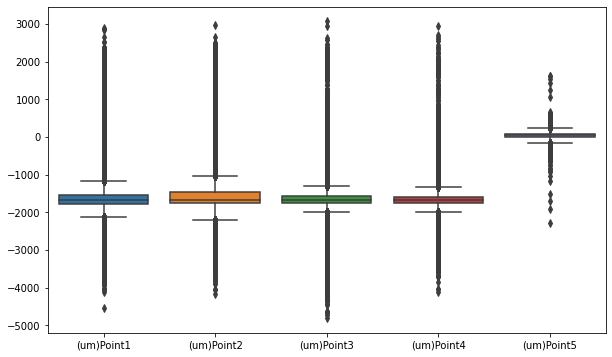

In [ ]:
umPointsDf = hotayiDf[['(um)Point1','(um)Point2','(um)Point3','(um)Point4','(um)Point5']]

fig = plt.figure(figsize =(10, 6))
sns.boxplot(data=umPointsDf)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f803535ae90>,
      dtype=object)

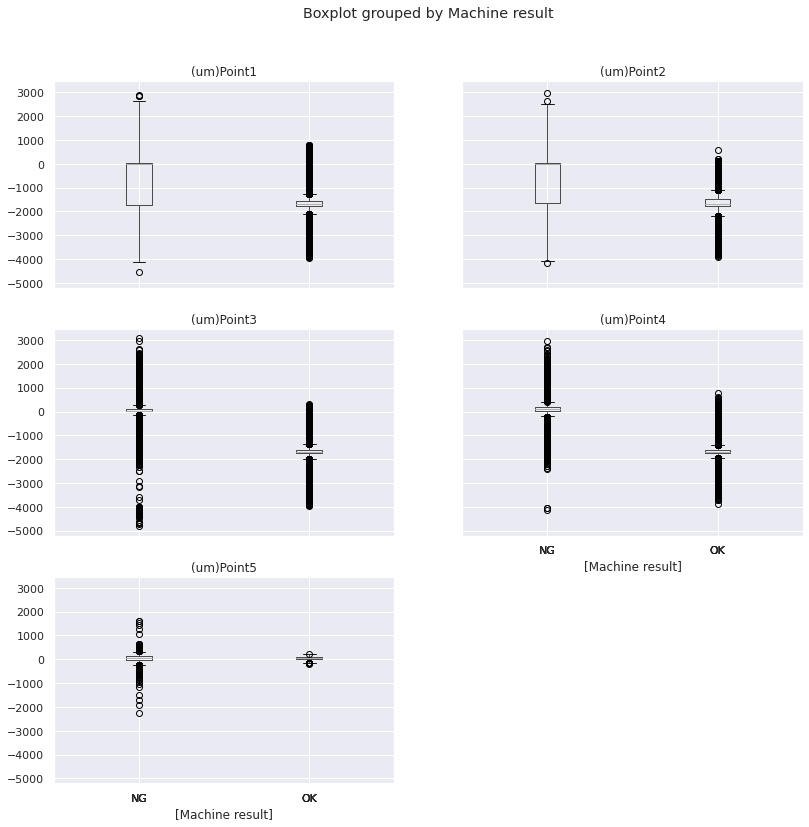

In [ ]:
#Yi hong

#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#hotayiDf['Machine result']=le.fit_transform(hotayiDf['Machine result'])
#hotayiDf.head()
#hotayiDf['Machine result'].unique()
sns.set(rc={'figure.figsize':(13,13)})

hotayiDf.boxplot(column=['(um)Point1', '(um)Point2', '(um)Point3', '(um)Point4', '(um)Point5'], by=['Machine result'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
DFprepare=hotayiDf.copy()
DFprepare['Machine result']=le.fit_transform(DFprepare['Machine result'])

DFprepare.head()

,Part,IC 2D,Lot,Date,Time,Machine,Server result,Machine result,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5,DayofWeek
0,791-00529,1,P 8 7,8/1/2020,8:38:33,PA05-1901,OK,1,14.7,9.9,118.7,66.3,88.1,Saturday
1,791-00529,1,P 8 7,8/1/2020,8:43:21,PA05-1901,OK,0,12.4,5.9,14.2,279.9,288.6,Saturday
2,791-00529,1,P 8 7,8/1/2020,8:46:05,PA05-1901,OK,1,36.4,16.5,-39.5,40.3,74.8,Saturday
3,791-00529,1,P 8 7,8/1/2020,12:43:41,PA05-1901,OK,1,7.9,2.9,51.0,27.9,-15.5,Saturday
4,791-00529,10,P 8 7,8/1/2020,8:46:34,PA05-1901,OK,0,-3.8,-0.2,30.0,200.7,203.3,Saturday


In [ ]:
umPointsDf.describe()

,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5
count,313337.000000,291491.000000,267007.00000,267007.000000,47789.000000
mean,-1425.177803,-1409.301335,-1383.61513,-1368.365508,41.703254
std,714.451334,696.767710,708.27223,719.184741,76.035265
min,-4539.700000,-4184.300000,-4809.00000,-4123.200000,-2274.800000
25%,-1775.700000,-1768.600000,-1745.35000,-1744.900000,-8.300000
50%,-1688.700000,-1669.200000,-1679.30000,-1680.100000,37.700000
75%,-1535.900000,-1474.300000,-1574.30000,-1584.400000,86.600000
max,2891.200000,2972.500000,3064.20000,2940.300000,1625.600000


In [ ]:
umPointsDf.corr()

,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5
(um)Point1,1.000000,0.950796,0.927812,0.897565,0.077741
(um)Point2,0.950796,1.000000,0.913608,0.898278,0.015676
(um)Point3,0.927812,0.913608,1.000000,0.949675,-0.248482
(um)Point4,0.897565,0.898278,0.949675,1.000000,0.193515
(um)Point5,0.077741,0.015676,-0.248482,0.193515,1.000000


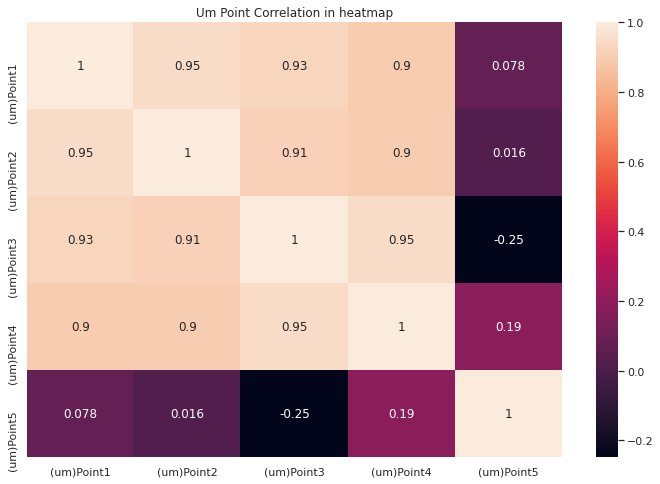

In [ ]:
plt.figure(figsize=(12,8))  
sns.heatmap(umPointsDf.corr(),annot=True)
plt.title('Um Point Correlation in heatmap')
plt.show()

# **Data Preparation**

Missing value

In [ ]:
percent_missing = hotayiDf.isnull().sum() * 100 / len(hotayiDf)
print(percent_missing)

Part               0.000000
IC 2D              0.000000
Lot                0.000000
Date               0.000000
Time               0.000000
Machine            0.000000
Server result      0.000000
Machine result     0.000000
(um)Point1         0.000000
(um)Point2         6.972046
(um)Point3        14.785997
(um)Point4        14.785997
(um)Point5        84.748370
DayofWeek          0.000000
dtype: float64


In [ ]:
hotayiDf.isnull().sum()

Part                   0
IC 2D                  0
Lot                    0
Date                   0
Time                   0
Machine                0
Server result          0
Machine result         0
(um)Point1             0
(um)Point2         21846
(um)Point3         46330
(um)Point4         46330
(um)Point5        265548
DayofWeek              0
dtype: int64

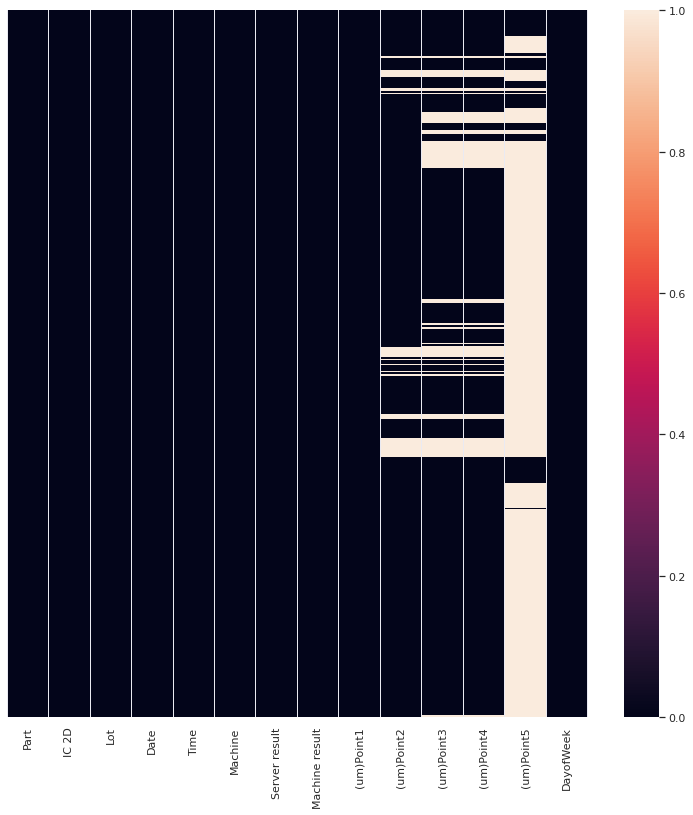

In [ ]:
sns.heatmap(data=hotayiDf.isnull(),yticklabels=False)

In [ ]:
print('stay home stay safe')

stay home stay safe


Drop the unnecessary data

In [ ]:
DFprepare=hotayiDf.drop({'Part', 'IC 2D', 'Lot', 'Date', 'Time', 'Machine', 'Server result','DayofWeek'},axis=1)
DFprepare.columns

Index(['Machine result', '(um)Point1', '(um)Point2', '(um)Point3',
       '(um)Point4', '(um)Point5'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
DFprepare['Machine result']=le.fit_transform(DFprepare['Machine result'])

DFprepare.head()

,Machine result,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5
0,1,14.7,9.9,118.7,66.3,88.1
1,0,12.4,5.9,14.2,279.9,288.6
2,1,36.4,16.5,-39.5,40.3,74.8
3,1,7.9,2.9,51.0,27.9,-15.5
4,0,-3.8,-0.2,30.0,200.7,203.3


In [ ]:
#too much null value in point 5 I will drop it
DFprepare.drop('(um)Point5',axis=1,inplace=True)
DFprepare.head()

,Machine result,(um)Point1,(um)Point2,(um)Point3,(um)Point4
0,1,14.7,9.9,118.7,66.3
1,0,12.4,5.9,14.2,279.9
2,1,36.4,16.5,-39.5,40.3
3,1,7.9,2.9,51.0,27.9
4,0,-3.8,-0.2,30.0,200.7


In [ ]:
DFprepare

,Machine result,(um)Point1,(um)Point2,(um)Point3,(um)Point4
0,1,14.7,9.9,118.7,66.3
1,0,12.4,5.9,14.2,279.9
2,1,36.4,16.5,-39.5,40.3
3,1,7.9,2.9,51.0,27.9
4,0,-3.8,-0.2,30.0,200.7
...,...,...,...,...,...
313332,1,-1520.0,-1516.6,NaN,NaN
313333,1,-1538.7,-1450.2,NaN,NaN
313334,1,-1539.9,-1459.4,NaN,NaN
313335,1,-1462.4,-1391.4,NaN,NaN


In [ ]:
# missing value drop
hotayiDfDropMissing = DFprepare.dropna()

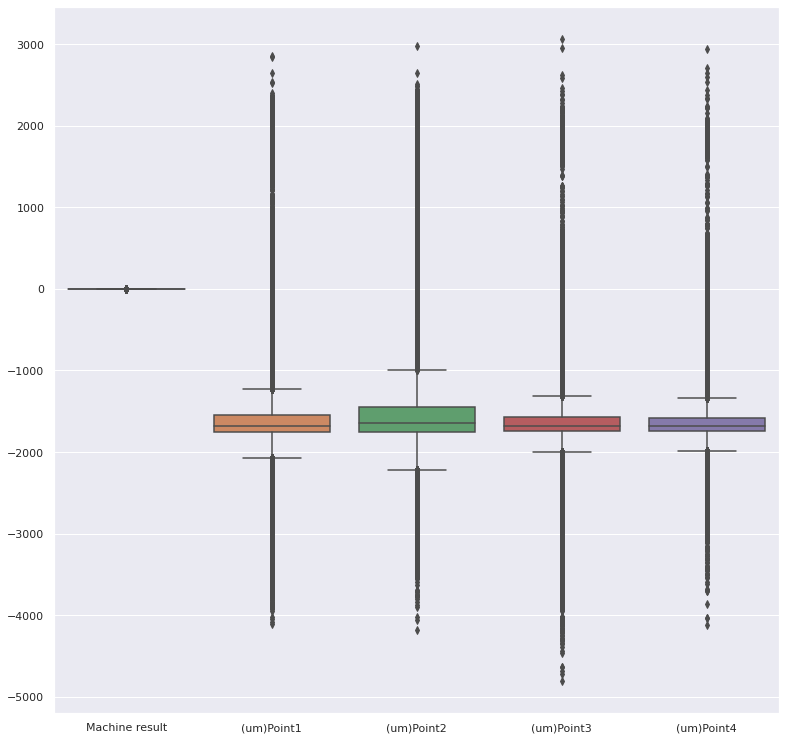

In [ ]:
sns.boxplot(data=hotayiDfDropMissing)
plt.show()

In [ ]:
hotayiDfDropMissing.shape

(267007, 5)

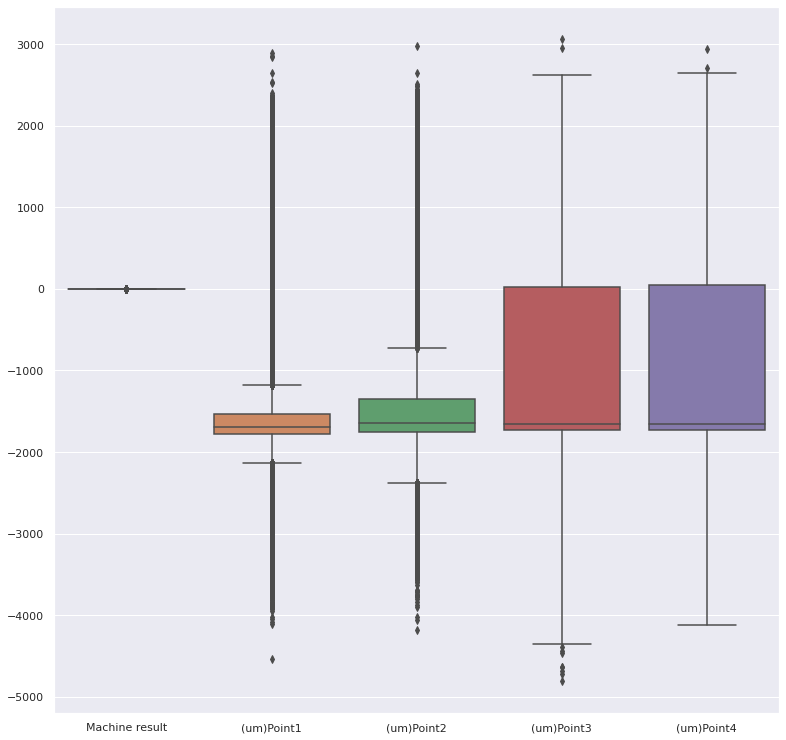

In [ ]:
# absolute meaan

hotayiDfABS= DFprepare.fillna(hotayiDf.mean().abs())
sns.boxplot(data=hotayiDfABS)
plt.show()

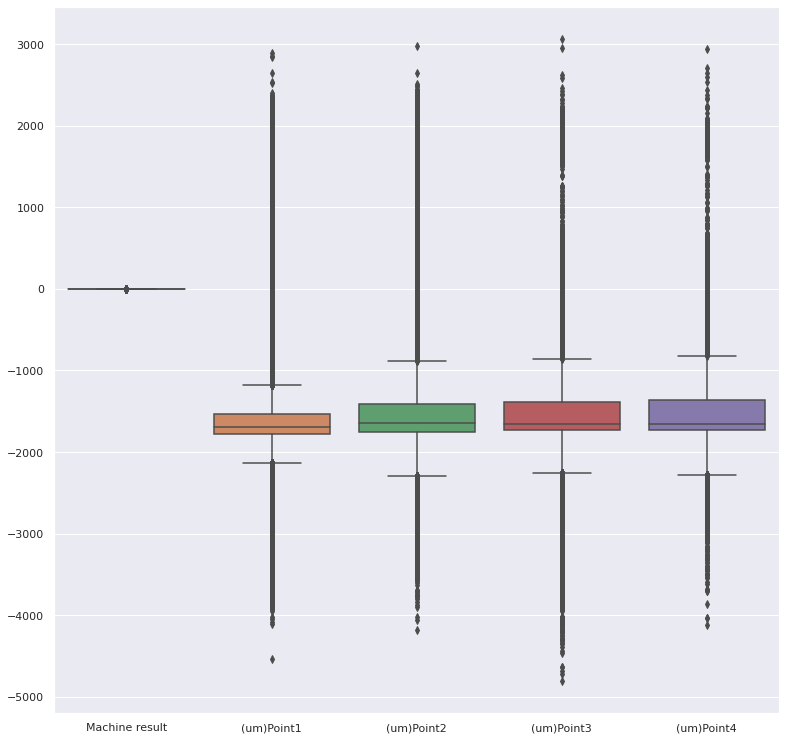

In [ ]:
# normal mean
hotayiDfmean = DFprepare.fillna(hotayiDf.mean())
sns.boxplot(data=hotayiDfmean)
plt.show()

In [ ]:
print('why google colab so slow geh zzz')

why google colab so slow geh zzz


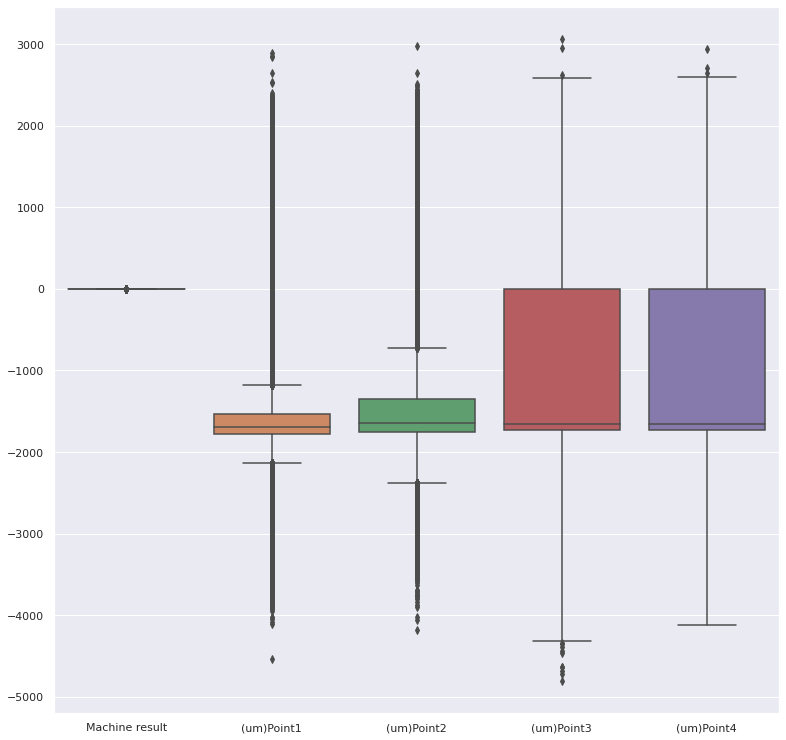

In [ ]:
# filled with zero
hotayiDfZero =DFprepare.fillna(0)
sns.boxplot(data=hotayiDfZero)
plt.show()

## Clean Outlier

In [ ]:
percent_missing = hotayiDfmean.isnull().sum() * 100 / len(hotayiDfmean)
print(percent_missing)

Machine result    0.0
(um)Point1        0.0
(um)Point2        0.0
(um)Point3        0.0
(um)Point4        0.0
dtype: float64


In [ ]:
#according to naturarity of data I will use normal mean method
cleanOutlier=hotayiDfmean.copy()

for x in ['(um)Point1']:
    q75,q25 = np.percentile(cleanOutlier.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    cleanOutlier.loc[cleanOutlier[x] < min,x] = np.nan
    cleanOutlier.loc[cleanOutlier[x] > max,x] = np.nan

for x in ['(um)Point2']:
    q75,q25 = np.percentile(cleanOutlier.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    cleanOutlier.loc[cleanOutlier[x] < min,x] = np.nan
    cleanOutlier.loc[cleanOutlier[x] > max,x] = np.nan

for x in ['(um)Point3']:
    q75,q25 = np.percentile(cleanOutlier.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    cleanOutlier.loc[cleanOutlier[x] < min,x] = np.nan
    cleanOutlier.loc[cleanOutlier[x] > max,x] = np.nan

for x in ['(um)Point4']:
    q75,q25 = np.percentile(cleanOutlier.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    cleanOutlier.loc[cleanOutlier[x] < min,x] = np.nan
    cleanOutlier.loc[cleanOutlier[x] > max,x] = np.nan


####The outlier will replace by nan
####I will not remove the outlier to avoid overfitting

In [ ]:
percent_missing = cleanOutlier.isnull().sum() * 100 / len(cleanOutlier)
print(percent_missing)

Machine result     0.000000
(um)Point1        22.877285
(um)Point2        16.937355
(um)Point3        16.373745
(um)Point4        17.007248
dtype: float64


In [ ]:
cleanOutlier = cleanOutlier.dropna(axis = 0)

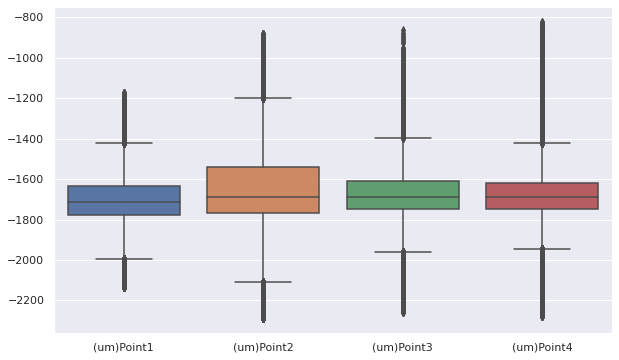

In [ ]:
fig = plt.figure(figsize =(10, 6))
sns.boxplot(data= cleanOutlier.drop(columns = ['Machine result']))
plt.show()

In [ ]:
cleanOutlier.columns

Index(['Machine result', '(um)Point1', '(um)Point2', '(um)Point3',
       '(um)Point4'],
      dtype='object')

In [ ]:
np.any(np.isnan(cleanOutlier))


False

In [ ]:
cleanOutlier.shape

(233242, 5)

# **Data Modeling**

# **Drop Missing Value Remain Outlier**

In [ ]:
#Remain Outlier and Remove all mising value
Dfset=hotayiDfDropMissing

X= Dfset.drop('Machine result',axis=1)
y= Dfset['Machine result']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size= 0.25,random_state=42)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,accuracy_score

# 1 max_features and 150 n_estimators 
rFCmodelDMRO=RandomForestClassifier(max_features=1,n_estimators=150)
rFCmodelDMRO.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,classification_report
# Visualizing Confusion Matrix using Heatmap
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix



ypred = rFCmodelDMRO.predict(Xtest)

rFpreScoreDMRO=precision_score(ytest,ypred)
rFaccScoreDMRO=accuracy_score(ytest,ypred)
rFrecScoreDMRO=recall_score(ytest,ypred)
rFf1ScoreDMRO = f1_score(ytest, ypred)
print("Precision_Score: ", rFpreScoreDMRO)
print("Accurancy_Score: ", rFaccScoreDMRO)
print("Recall_Score: ", rFrecScoreDMRO)
print("F1_Score: ", rFf1ScoreDMRO)

print(classification_report(ytest, ypred))



Precision_Score:  0.9821373717515512
Accurancy_Score:  0.9814537392138063
Recall_Score:  0.9988284910965324
F1_Score:  0.9904126138405304
              precision    recall  f1-score   support

           0       0.95      0.57      0.72      2732
           1       0.98      1.00      0.99     64020

    accuracy                           0.98     66752
   macro avg       0.97      0.79      0.85     66752
weighted avg       0.98      0.98      0.98     66752



## Logistic Regression

Grid Search for Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} 
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(Xtrain,ytrain)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.9662180693188741


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score

clf_D1 = LogisticRegression(penalty = 'l2', C = 0.001).fit(Xtrain,ytrain)
linear_predict_D1 = clf_D1.predict(Xtest)

print('Logistic Regression test Accuracy: {:.2f}%'.format(clf_D1.score(Xtest,ytest)))
print('Logistic Regression training Accuracy: {:.2f}%'.format(clf_D1.score(Xtrain,ytrain)))

Logistic Regression test Accuracy: 0.96%
Logistic Regression training Accuracy: 0.97%


In [ ]:

LGD1preScore=precision_score(ytest,linear_predict_D1)
LGD1accScore=accuracy_score(ytest,linear_predict_D1)
LGD1recScore=recall_score(ytest,linear_predict_D1)
LGD1f1Score = f1_score(ytest, linear_predict_D1)
print("Precision_Score: ", LGD1preScore)
print("Accuracy_Score: ", LGD1accScore)
print("Recall_Score: ", LGD1recScore)
print("F1-Score :", LGD1f1Score)

Precision_Score:  0.9634601492896702
Accuracy_Score:  0.9636265580057526
Recall_Score:  1.0
F1-Score : 0.9813900726614956


In [ ]:
print(classification_report(ytest, linear_predict_D1))

              precision    recall  f1-score   support

           0       1.00      0.11      0.20      2732
           1       0.96      1.00      0.98     64020

    accuracy                           0.96     66752
   macro avg       0.98      0.56      0.59     66752
weighted avg       0.96      0.96      0.95     66752



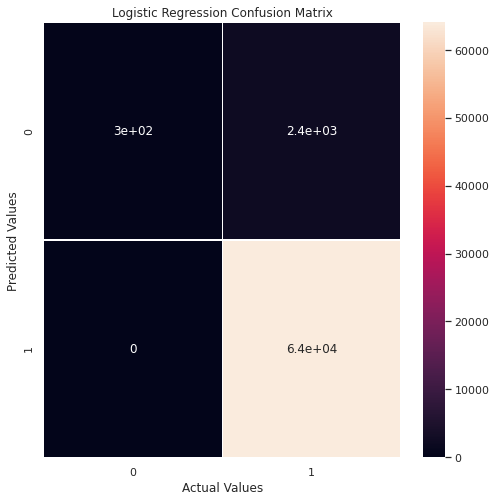

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
LG = confusion_matrix(ytest,linear_predict_D1)
plt.subplots(figsize=(8,8))

sns.heatmap(LG,annot=True,linewidths=0.5)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

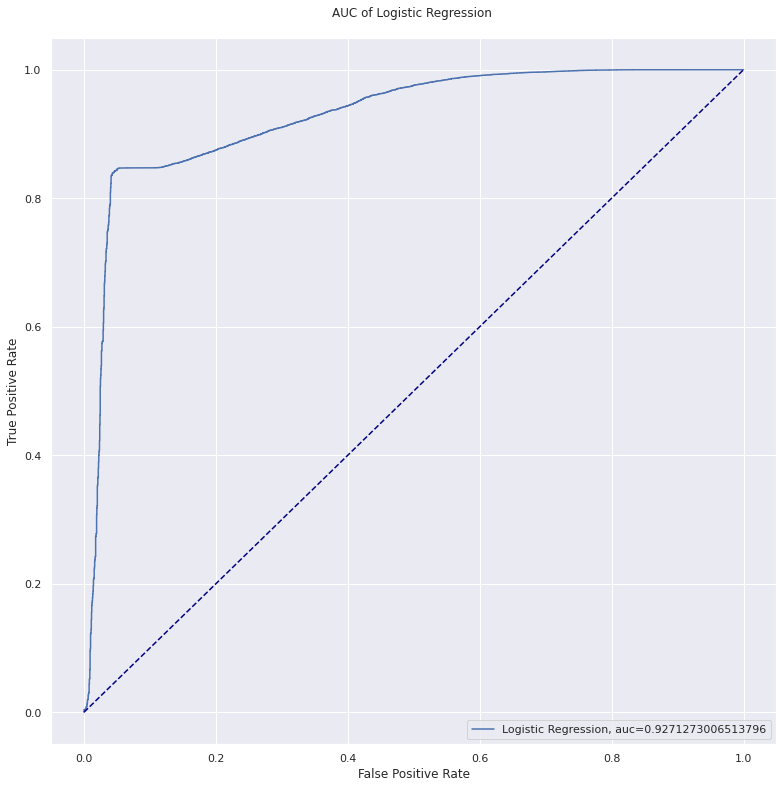

AUC: 0.927


In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_proba = clf_D1.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc=4)
plt.title("AUC of Logistic Regression \n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

auc = roc_auc_score(ytest, y_pred_proba)
print('AUC: %.3f' % auc)

## Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
svmModel_D1 = SVC(kernel='rbf', C=1,probability=True).fit(Xtrain, ytrain)
svm_predict_D1 = svmModel_D1.predict(Xtest)

print('SVM test Accuracy: {:.2f}%'.format(svmModel_D1.score(Xtest,ytest)))
print('SVM training Accuracy: {:.2f}%'.format(svmModel_D1.score(Xtrain,ytrain)))

SVM test Accuracy: 0.97%
SVM training Accuracy: 0.98%


In [ ]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,classification_report,f1_score,confusion_matrix

SVMD1preScore=precision_score(ytest,svm_predict_D1)
SVMD1accScore=accuracy_score(ytest,svm_predict_D1)
SVMD1recScore=recall_score(ytest,svm_predict_D1)
SVMD1f1Score = f1_score(ytest, svm_predict_D1)
print("Precision_Score: ", SVMD1preScore)
print("Accuracy_Score: ", SVMD1accScore)
print("Recall_Score: ", SVMD1recScore)
print("F1-Score :", SVMD1f1Score)

Precision_Score:  0.9735957534184069
Accuracy_Score:  0.9738584611697028
Recall_Score:  0.9998594189315839
F1-Score : 0.9865528215956292


In [ ]:
print(classification_report(ytest, svm_predict_D1))

              precision    recall  f1-score   support

           0       0.99      0.36      0.53      2732
           1       0.97      1.00      0.99     64020

    accuracy                           0.97     66752
   macro avg       0.98      0.68      0.76     66752
weighted avg       0.97      0.97      0.97     66752



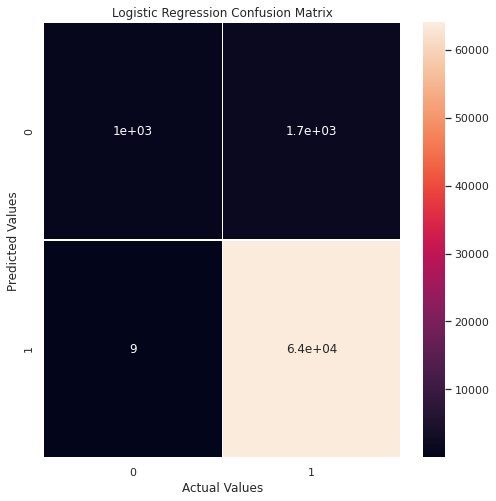

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
svmMatrix = confusion_matrix(ytest,svm_predict_D1)
plt.subplots(figsize=(8,8))

sns.heatmap(svmMatrix,annot=True,linewidths=0.5)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

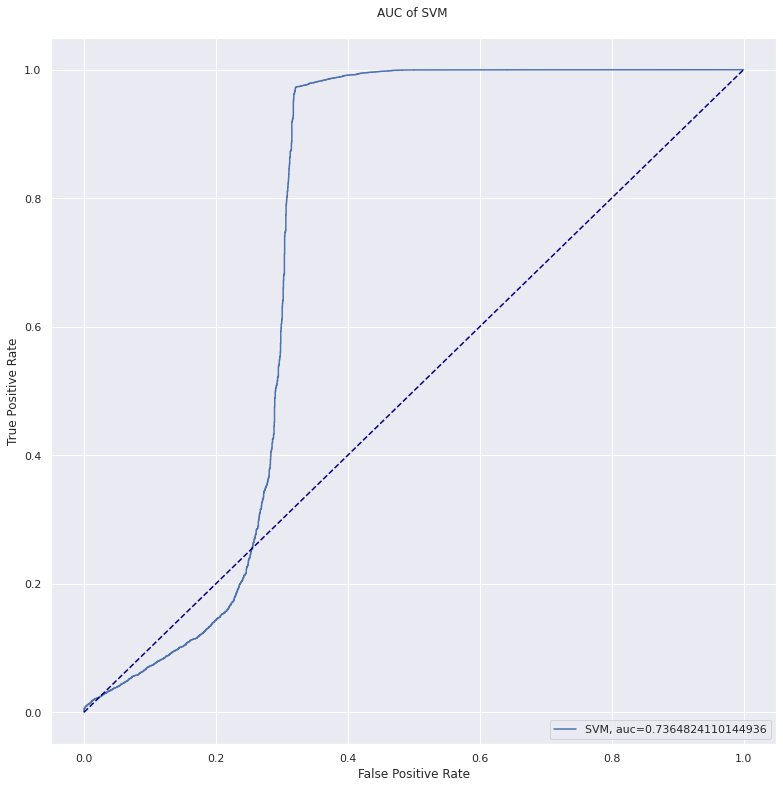

AUC: 0.736


In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_proba = svmModel_D1.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr,tpr,label="SVM, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc=4)
plt.title("AUC of SVM \n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

auc = roc_auc_score(ytest, y_pred_proba)
print('AUC: %.3f' % auc)



## Naive Bayes


In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Instantiate classifier
nbModel_d1 = GaussianNB()

#Train the model
nbModel_d1.fit(Xtrain, ytrain)

#Predict data
nbModel_y_pred_d1 = nbModel_d1.predict(Xtest)

In [ ]:
#Evaluation of model
from sklearn.metrics import precision_score,accuracy_score,recall_score,classification_report

NBpreScore_d1=precision_score(ytest,nbModel_y_pred_d1)
NBaccScore_d1=accuracy_score(ytest,nbModel_y_pred_d1)
NBrecScore_d1=recall_score(ytest,nbModel_y_pred_d1)
NBf1Score_d1=f1_score(ytest,nbModel_y_pred_d1)
print("Precision_Score: ", NBpreScore_d1)
print("Accurancy_Score: ", NBaccScore_d1)
print("Recall_Score: ", NBrecScore_d1)
print("F1_Score: ", NBf1Score_d1)
print('Accuracy of naive bayes classifier on training set: {:.2f}%'
     .format(nbModel_d1.score(Xtrain, ytrain)))
print('Accuracy of naive bayes classifier on test set: {:.2f}%'
     .format(nbModel_d1.score(Xtest, ytest)))

Precision_Score:  0.996143038183922
Accurancy_Score:  0.8502966203259827
Recall_Score:  0.8471883786316776
F1_Score:  0.9156473954772216
Accuracy of naive bayes classifier on training set: 0.85%
Accuracy of naive bayes classifier on test set: 0.85%


In [ ]:
#Classification report
print(classification_report(ytest,nbModel_y_pred_d1))

              precision    recall  f1-score   support

           0       0.20      0.92      0.34      2732
           1       1.00      0.85      0.92     64020

    accuracy                           0.85     66752
   macro avg       0.60      0.89      0.63     66752
weighted avg       0.96      0.85      0.89     66752



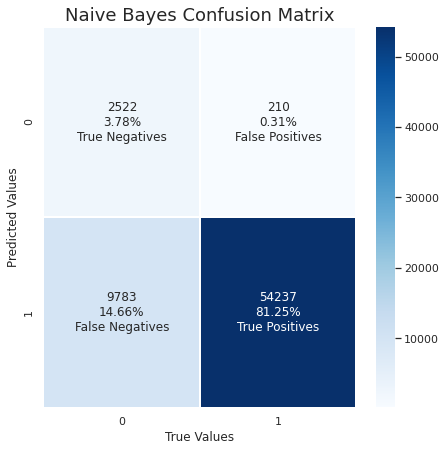

In [ ]:
#Confusion Matrix
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

nb_cm = confusion_matrix(ytest,nbModel_y_pred_d1)

plt.subplots(figsize=(7,7))

nb_group_names = ["True Negatives","False Positives","False Negatives","True Positives"]
nb_group_counts = ["{0:0.0f}".format(value) for value in
                nb_cm.flatten()]
nb_group_percentages = ["{0:.2%}".format(value) for value in
                     nb_cm.flatten()/np.sum(nb_cm)]

nb_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(nb_group_counts,nb_group_percentages,nb_group_names)]
nb_labels = np.asarray(nb_labels).reshape(2,2)

#to remove the scientific value
sns.heatmap(nb_cm,annot= nb_labels,fmt="",linewidths=0.5,cmap = "Blues")
sns.set(font_scale=1.5)

plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.show()


## K-Nearest Neighbours (KNN)

In [ ]:
# Remain Outlier and Remove all mising value
Dfset = hotayiDfDropMissing

X = Dfset.drop('Machine result', axis=1)
y = Dfset['Machine result']

### Original Dataset

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn_dmro = KNeighborsClassifier(n_neighbors = 5)
# Train model
knn_dmro_model = knn_dmro.fit(Xtrain, ytrain)
# Predict model response
knn_dmro_predict = knn_dmro_model.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

KNNaccScore_dmro = accuracy_score(ytest, knn_dmro_predict)
KNNpreScore_dmro = precision_score(ytest, knn_dmro_predict)
KNNrecScore_dmro = recall_score(ytest, knn_dmro_predict)
KNNf1Score_dmro = f1_score(ytest, knn_dmro_predict)

print("=== KNN Algorithm (DMRO) ===")
print("Accuracy : %f" %KNNaccScore_dmro)
print("Precision: %f" %KNNpreScore_dmro)
print("Recall   : %f" %KNNrecScore_dmro)
print("F1-Score : %f" %KNNf1Score_dmro)
print("===                      ===\n")

print(classification_report(ytest, knn_dmro_predict))

=== KNN Algorithm (DMRO) ===
Accuracy : 0.980495
Precision: 0.982461
Recall   : 0.997470
F1-Score : 0.989908
===                      ===

              precision    recall  f1-score   support

           0       0.91      0.58      0.71      2732
           1       0.98      1.00      0.99     64020

    accuracy                           0.98     66752
   macro avg       0.95      0.79      0.85     66752
weighted avg       0.98      0.98      0.98     66752



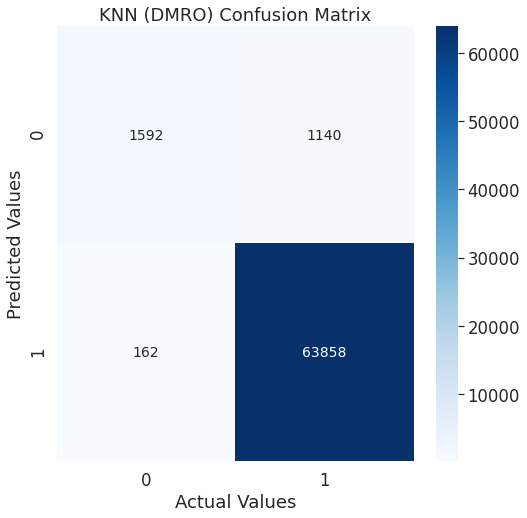

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

knnMatrix = confusion_matrix(ytest, knn_dmro_predict)
plt.subplots(figsize=(8,8))

sns.heatmap(knnMatrix, annot=True, fmt='d', cmap="Blues", annot_kws={'fontsize':14})
plt.title("KNN (DMRO) Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

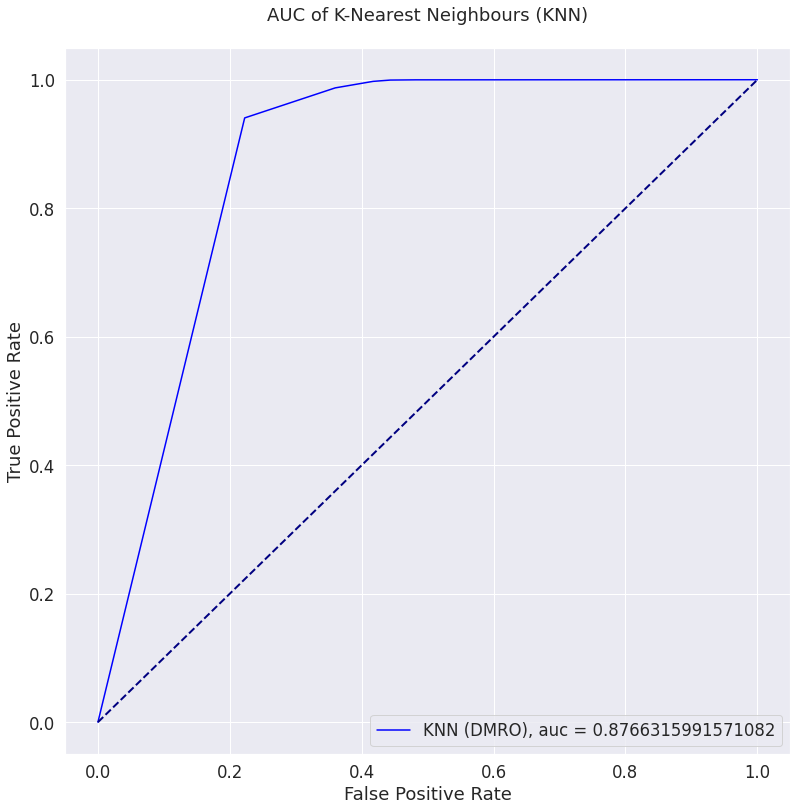

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

y_pred_proba = knn_dmro.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
knn_auc = metrics.roc_auc_score(ytest, y_pred_proba) 

plt.plot(fpr, tpr, label="KNN (DMRO), auc = " + str(knn_auc), color='blue')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc = 4)

plt.title("AUC of K-Nearest Neighbours (KNN)\n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### Standardization on Dataset

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train_stand = Xtrain.copy()
X_test_stand = Xtest.copy()

# Standardization
scaler = StandardScaler()
X_train_stand = scaler.fit_transform(X_train_stand)
X_test_stand = scaler.transform(X_test_stand)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn_dmro_stand = KNeighborsClassifier(n_neighbors = 5)
# Train model
knn_dmro_stand_model = knn_dmro_stand.fit(X_train_stand, ytrain)
# Predict model response
knn_dmro_stand_predict = knn_dmro_stand_model.predict(X_test_stand)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

KNNaccScore_dmro_stand = accuracy_score(ytest, knn_dmro_stand_predict)
KNNpreScore_dmro_stand = precision_score(ytest, knn_dmro_stand_predict)
KNNrecScore_dmro_stand = recall_score(ytest, knn_dmro_stand_predict)
KNNf1Score_dmro_stand = f1_score(ytest, knn_dmro_stand_predict)

print("=== KNN Algorithm (DMRO_Standardized) ===")
print("Accuracy : %f" %KNNaccScore_dmro_stand)
print("Precision: %f" %KNNpreScore_dmro_stand)
print("Recall   : %f" %KNNrecScore_dmro_stand)
print("F1-Score : %f" %KNNf1Score_dmro_stand)
print("===                                      ===\n")

print(classification_report(ytest, knn_dmro_stand_predict))

=== KNN Algorithm (DMRO_Standardized) ===
Accuracy : 0.980570
Precision: 0.982477
Recall   : 0.997532
F1-Score : 0.989947
===                                      ===

              precision    recall  f1-score   support

           0       0.91      0.58      0.71      2732
           1       0.98      1.00      0.99     64020

    accuracy                           0.98     66752
   macro avg       0.95      0.79      0.85     66752
weighted avg       0.98      0.98      0.98     66752



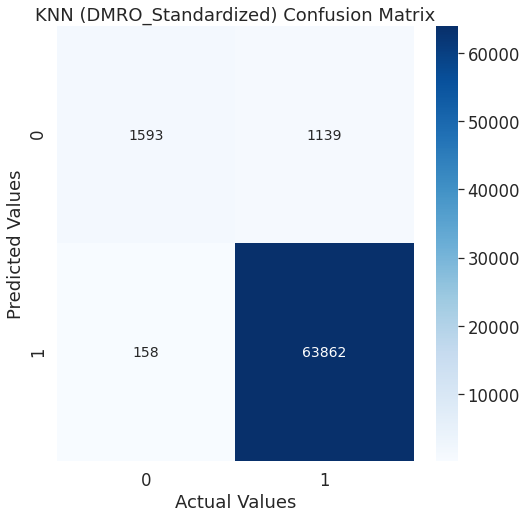

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

knnMatrix = confusion_matrix(ytest, knn_dmro_stand_predict)
plt.subplots(figsize=(8,8))

sns.heatmap(knnMatrix, annot=True, fmt='d', cmap="Blues", annot_kws={'fontsize':14})
plt.title("KNN (DMRO_Standardized) Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

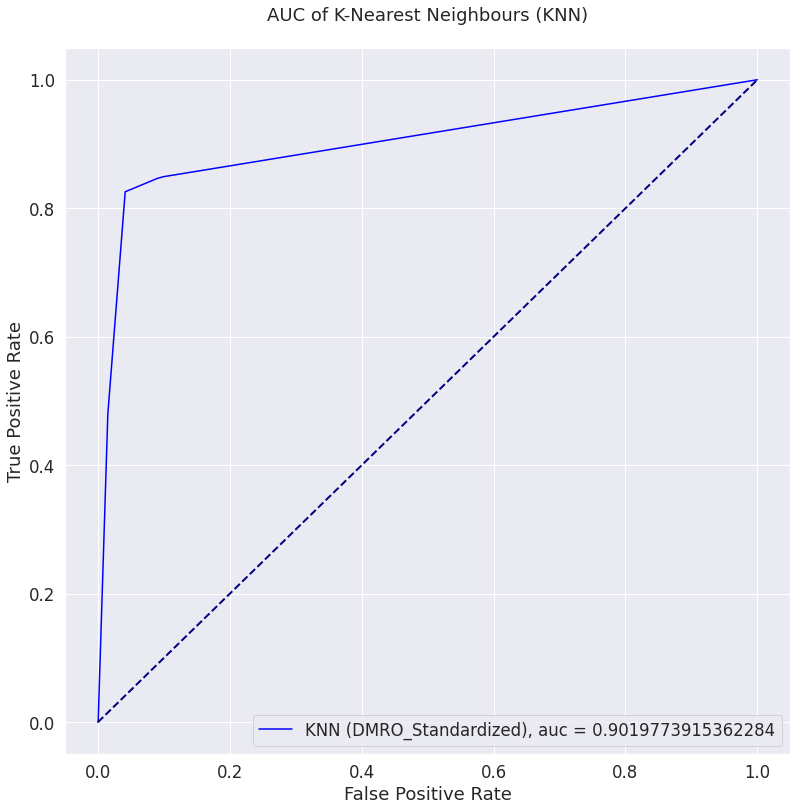

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

y_pred_proba = knn_dmro_stand.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
knn_auc = metrics.roc_auc_score(ytest, y_pred_proba) 

plt.plot(fpr, tpr, label="KNN (DMRO_Standardized), auc = " + str(knn_auc), color='blue')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc = 4)

plt.title("AUC of K-Nearest Neighbours (KNN)\n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### Normalization on Dataset

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_train_norm = Xtrain.copy()
X_test_norm = Xtest.copy()

# Normalization
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train_norm)
X_test_norm = scaler.transform(X_test_norm)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn_dmro_norm = KNeighborsClassifier(n_neighbors = 5)
# Train model
knn_dmro_norm_model = knn_dmro_norm.fit(X_train_norm, ytrain)
# Predict model response
knn_dmro_norm_predict = knn_dmro_norm_model.predict(X_test_norm)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

KNNaccScore_dmro_norm = accuracy_score(ytest, knn_dmro_norm_predict)
KNNpreScore_dmro_norm = precision_score(ytest, knn_dmro_norm_predict)
KNNrecScore_dmro_norm = recall_score(ytest, knn_dmro_norm_predict)
KNNf1Score_dmro_norm = f1_score(ytest, knn_dmro_norm_predict)

print("=== KNN Algorithm (DMRO_Normalized) ===")
print("Accuracy : %f" %KNNaccScore_dmro_norm)
print("Precision: %f" %KNNpreScore_dmro_norm)
print("Recall   : %f" %KNNrecScore_dmro_norm)
print("F1-Score : %f" %KNNf1Score_dmro_norm)
print("===                                    ===\n")

print(classification_report(ytest, knn_dmro_norm_predict))

=== KNN Algorithm (DMRO_Normalized) ===
Accuracy : 0.980495
Precision: 0.982461
Recall   : 0.997470
F1-Score : 0.989908
===                                    ===

              precision    recall  f1-score   support

           0       0.91      0.58      0.71      2732
           1       0.98      1.00      0.99     64020

    accuracy                           0.98     66752
   macro avg       0.95      0.79      0.85     66752
weighted avg       0.98      0.98      0.98     66752



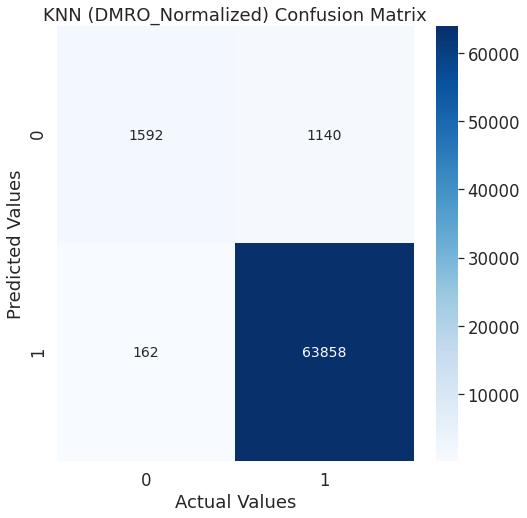

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

knnMatrix = confusion_matrix(ytest, knn_dmro_norm_predict)
plt.subplots(figsize=(8,8))

sns.heatmap(knnMatrix, annot=True, fmt='d', cmap="Blues", annot_kws={'fontsize':14})
plt.title("KNN (DMRO_Normalized) Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

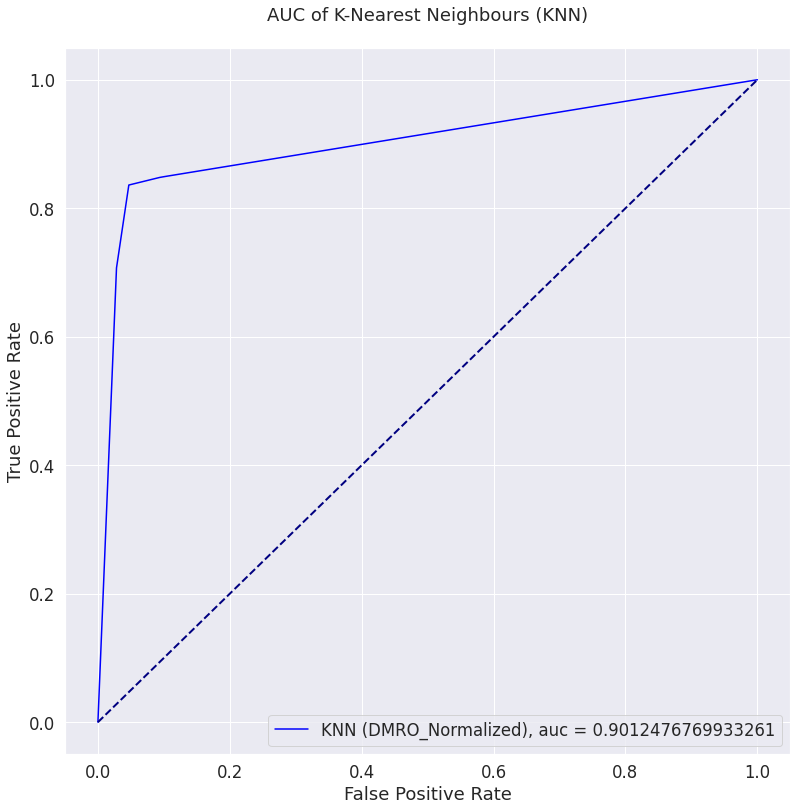

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

y_pred_proba = knn_dmro_norm.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
knn_auc = metrics.roc_auc_score(ytest, y_pred_proba) 

plt.plot(fpr, tpr, label="KNN (DMRO_Normalized), auc = " + str(knn_auc), color='blue')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc = 4)

plt.title("AUC of K-Nearest Neighbours (KNN)\n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### Combination

In [ ]:
from sklearn.metrics import mean_squared_error

dmro_rmse = []

# original training and testing data
dmro_rmse.append( np.sqrt(mean_squared_error(ytest, knn_dmro_predict)) )
# standardized training and testing data
dmro_rmse.append( np.sqrt(mean_squared_error(ytest, knn_dmro_stand_predict)) )
# normalized training and testing data
dmro_rmse.append( np.sqrt(mean_squared_error(ytest, knn_dmro_norm_predict)) )

# visualizing rmse result
knn_dmro_rmse = pd.DataFrame({'DMRO_RMSE':dmro_rmse}, index=['Original', 'Standardized', 'Normalized'])
knn_dmro_rmse

,DMRO_RMSE
Original,0.139660
Standardized,0.139392
Normalized,0.139660


#  **Outlier Missing Value Filled with Zero**

In [ ]:
#Remain Outlier and Remove all mising value
Dfset=hotayiDfZero

X= Dfset.drop('Machine result',axis=1)
y= Dfset['Machine result']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size= 0.25,random_state=42)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,accuracy_score

rFCmodelROZ=RandomForestClassifier()
rFCmodelROZ.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,classification_report
# Visualizing Confusion Matrix using Heatmap
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

ypred = rFCmodelROZ.predict(Xtest)

rFpreScoreROZ=precision_score(ytest,ypred)
rFaccScoreROZ=accuracy_score(ytest,ypred)
rFrecScoreROZ=recall_score(ytest,ypred)
rFf1ScoreROZ = f1_score(ytest, ypred)
print("Precision_Score: ", rFpreScoreROZ)
print("Accurancy_Score: ", rFaccScoreROZ)
print("Recall_Score: ", rFrecScoreROZ)
print("F1_Score: ", rFf1ScoreROZ)
print(classification_report(ytest, ypred))

Precision_Score:  0.9796498243860088
Accurancy_Score:  0.9774302674411183
Recall_Score:  0.9970412220690025
F1_Score:  0.9882690164021446
              precision    recall  f1-score   support

           0       0.90      0.58      0.70      3642
           1       0.98      1.00      0.99     74693

    accuracy                           0.98     78335
   macro avg       0.94      0.79      0.85     78335
weighted avg       0.98      0.98      0.98     78335



## Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} 
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(Xtrain,ytrain)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.9568854737734112


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score

clf_D3 = LogisticRegression(penalty = 'l2', C = 0.001).fit(Xtrain,ytrain)
linear_predict_D3 = clf_D3.predict(Xtest)

print('Logistic Regression test Accuracy: {:.2f}%'.format(clf_D3.score(Xtest,ytest)))
print('Logistic Regression training Accuracy: {:.2f}%'.format(clf_D3.score(Xtrain,ytrain)))

Logistic Regression test Accuracy: 0.96%
Logistic Regression training Accuracy: 0.96%


In [ ]:
LGD3preScore=precision_score(ytest,linear_predict_D3)
LGD3accScore=accuracy_score(ytest,linear_predict_D3)
LGD3recScore=recall_score(ytest,linear_predict_D3)
LGD3f1Score = f1_score(ytest, linear_predict_D3)
print("Precision_Score: ", LGD3preScore)
print("Accuracy_Score: ", LGD3accScore)
print("Recall_Score: ", LGD3recScore)
print("F1-Score :", LGD3f1Score)

Precision_Score:  0.9562395175848516
Accuracy_Score:  0.9563158230675943
Recall_Score:  0.9999464474582624
F1-Score : 0.9776047120418849


In [ ]:
print(classification_report(ytest, linear_predict_D3))

              precision    recall  f1-score   support

           0       0.98      0.06      0.12      3642
           1       0.96      1.00      0.98     74693

    accuracy                           0.96     78335
   macro avg       0.97      0.53      0.55     78335
weighted avg       0.96      0.96      0.94     78335



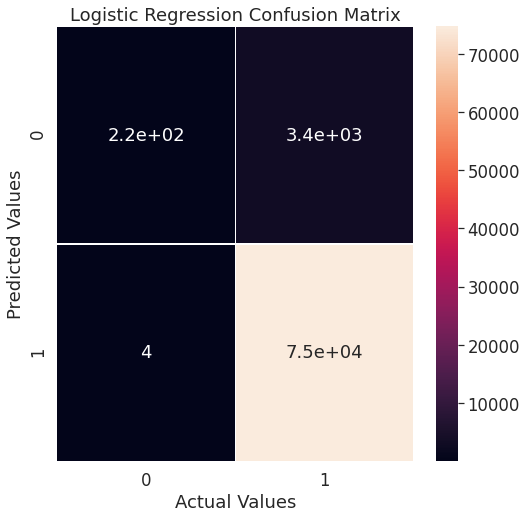

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
LG = confusion_matrix(ytest,linear_predict_D3)
plt.subplots(figsize=(8,8))

sns.heatmap(LG,annot=True,linewidths=0.5)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

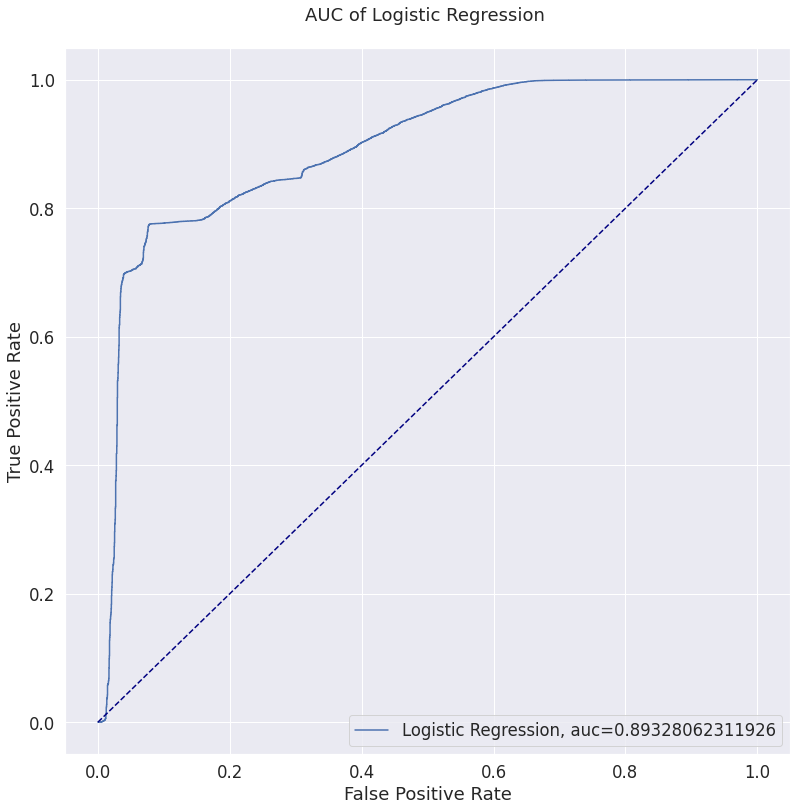

AUC: 0.893


In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_proba = clf_D3.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc=4)
plt.title("AUC of Logistic Regression \n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

auc = roc_auc_score(ytest, y_pred_proba)
print('AUC: %.3f' % auc)

## Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
svmModel_D3 = SVC(kernel='rbf', C=1,probability=True).fit(Xtrain, ytrain)
svm_predict_D3 = svmModel_D3.predict(Xtest)

print('SVM test Accuracy: {:.2f}%'.format(svmModel_D3.score(Xtest,ytest)))
print('SVM training Accuracy: {:.2f}%'.format(svmModel_D3.score(Xtrain,ytrain)))

SVM test Accuracy: 0.97%
SVM training Accuracy: 0.97%


In [ ]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,classification_report,f1_score,confusion_matrix

SVMD3preScore=precision_score(ytest,svm_predict_D3)
SVMD3accScore=accuracy_score(ytest,svm_predict_D3)
SVMD3recScore=recall_score(ytest,svm_predict_D3)
SVMD3f1Score = f1_score(ytest, svm_predict_D3)
print("Precision_Score: ", SVMD3preScore)
print("Accuracy_Score: ", SVMD3accScore)
print("Recall_Score: ", SVMD3recScore)
print("F1-Score :", SVMD3f1Score)

Precision_Score:  0.9665842385323477
Accuracy_Score:  0.9666049658517903
Recall_Score:  0.9995314152597967
F1-Score : 0.9827817707921965


In [ ]:
print(classification_report(ytest, svm_predict_D3))

              precision    recall  f1-score   support

           0       0.97      0.29      0.45      3642
           1       0.97      1.00      0.98     74693

    accuracy                           0.97     78335
   macro avg       0.97      0.65      0.72     78335
weighted avg       0.97      0.97      0.96     78335



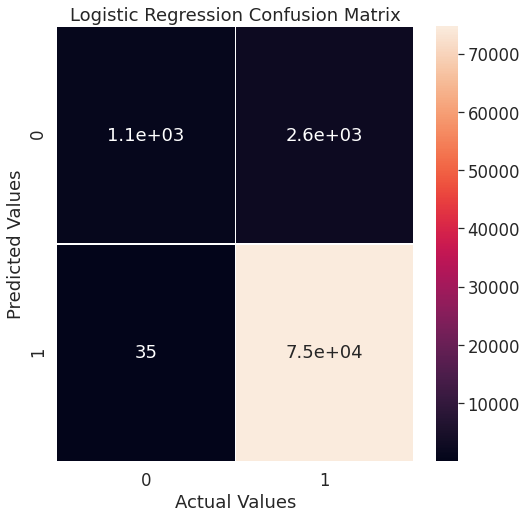

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
svmMatrix = confusion_matrix(ytest,svm_predict_D3)
plt.subplots(figsize=(8,8))

sns.heatmap(svmMatrix,annot=True,linewidths=0.5)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

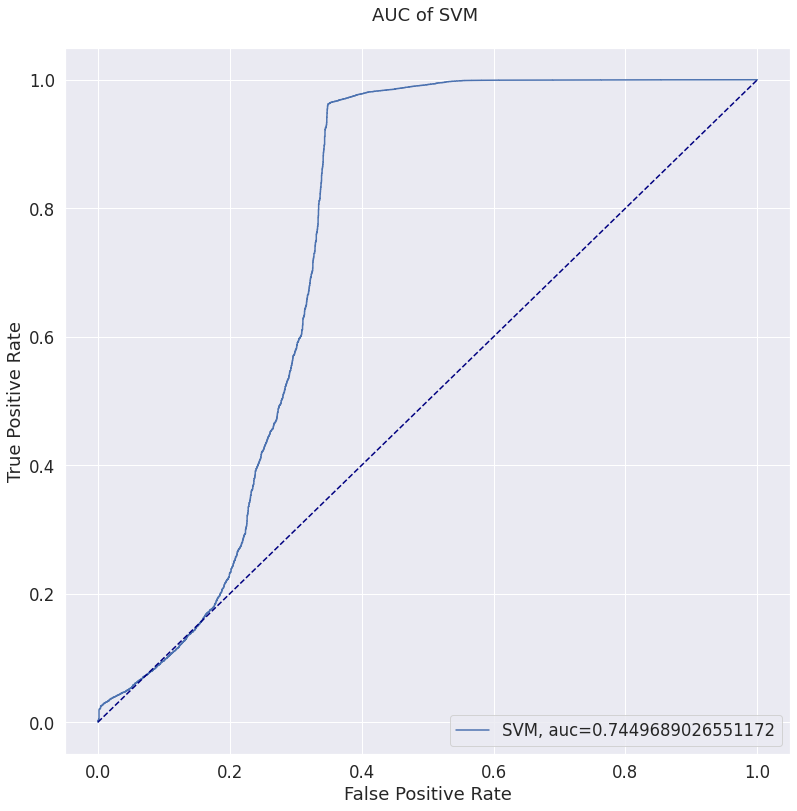

AUC: 0.745


In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_proba = svmModel_D3.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr,tpr,label="SVM, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc=4)
plt.title("AUC of SVM \n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

auc = roc_auc_score(ytest, y_pred_proba)
print('AUC: %.3f' % auc)

## Naive Bayes

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Instantiate classifier
nbModel_d3 = GaussianNB()

#Train the model
nbModel_d3.fit(Xtrain, ytrain)

#Predict data
nbModel_y_pred_d3 = nbModel_d3.predict(Xtest)

In [ ]:
#Evaluation of model
from sklearn.metrics import precision_score,accuracy_score,recall_score,classification_report

NBpreScore_d3=precision_score(ytest,nbModel_y_pred_d3)
NBaccScore_d3=accuracy_score(ytest,nbModel_y_pred_d3)
NBrecScore_d3=recall_score(ytest,nbModel_y_pred_d3)
NBf1Score_d3=f1_score(ytest,nbModel_y_pred_d3)
print("Precision_Score: ", NBpreScore_d3)
print("Accurancy_Score: ", NBaccScore_d3)
print("Recall_Score: ", NBrecScore_d3)
print("F1_Score: ", NBf1Score_d3)
print('Accuracy of naive bayes classifier on training set: {:.2f}%'
     .format(nbModel_d3.score(Xtrain, ytrain)))
print('Accuracy of naive bayes classifier on test set: {:.2f}%'
     .format(nbModel_d3.score(Xtest, ytest)))

Precision_Score:  0.9833040130115843
Accurancy_Score:  0.7899917023042063
Recall_Score:  0.793220248216031
F1_Score:  0.8780928809088012
Accuracy of naive bayes classifier on training set: 0.79%
Accuracy of naive bayes classifier on test set: 0.79%


In [ ]:
#Classification report
print(classification_report(ytest,nbModel_y_pred_d3))

              precision    recall  f1-score   support

           0       0.15      0.72      0.24      3642
           1       0.98      0.79      0.88     74693

    accuracy                           0.79     78335
   macro avg       0.56      0.76      0.56     78335
weighted avg       0.94      0.79      0.85     78335



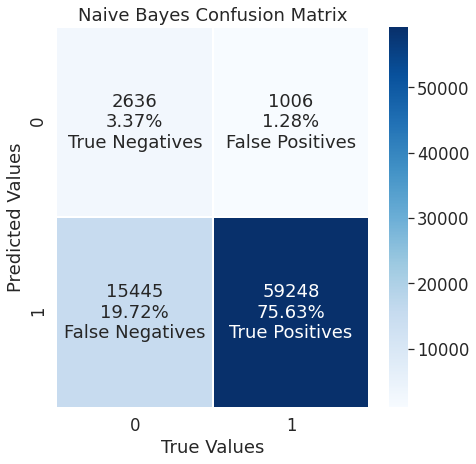

In [ ]:
#Confusion Matrix
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

nb_cm = confusion_matrix(ytest,nbModel_y_pred_d3)

plt.subplots(figsize=(7,7))

nb_group_names = ["True Negatives","False Positives","False Negatives","True Positives"]
nb_group_counts = ["{0:0.0f}".format(value) for value in
                nb_cm.flatten()]
nb_group_percentages = ["{0:.2%}".format(value) for value in
                     nb_cm.flatten()/np.sum(nb_cm)]

nb_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(nb_group_counts,nb_group_percentages,nb_group_names)]
nb_labels = np.asarray(nb_labels).reshape(2,2)

#to remove the scientific value
sns.heatmap(nb_cm,annot= nb_labels,fmt="",linewidths=0.5,cmap = "Blues")
sns.set(font_scale=1.5)

plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.show()


## K-Nearest Neighbours (KNN)

In [ ]:
# Remain Outlier Missing Value Filled with Zero
Dfset = hotayiDfZero

X = Dfset.drop('Machine result', axis=1)
y = Dfset['Machine result']

### Original Dataset

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn_roz = KNeighborsClassifier(n_neighbors = 5)
# Train model
knn_roz_model = knn_roz.fit(Xtrain, ytrain)
# Predict model response
knn_roz_predict = knn_roz_model.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

KNNaccScore_roz = accuracy_score(ytest, knn_roz_predict)
KNNpreScore_roz = precision_score(ytest, knn_roz_predict)
KNNrecScore_roz = recall_score(ytest, knn_roz_predict)
KNNf1Score_roz = f1_score(ytest, knn_roz_predict)

print("=== KNN Algorithm (ROZ) ===")
print("Accuracy : %f" %KNNaccScore_roz)
print("Precision: %f" %KNNpreScore_roz)
print("Recall   : %f" %KNNrecScore_roz)
print("F1-Score : %f" %KNNf1Score_roz)
print("===                     ===\n")

print(classification_report(ytest, knn_roz_predict))

=== KNN Algorithm (ROZ) ===
Accuracy : 0.976677
Precision: 0.979773
Recall   : 0.996104
F1-Score : 0.987871
===                     ===

              precision    recall  f1-score   support

           0       0.88      0.58      0.70      3642
           1       0.98      1.00      0.99     74693

    accuracy                           0.98     78335
   macro avg       0.93      0.79      0.84     78335
weighted avg       0.98      0.98      0.97     78335



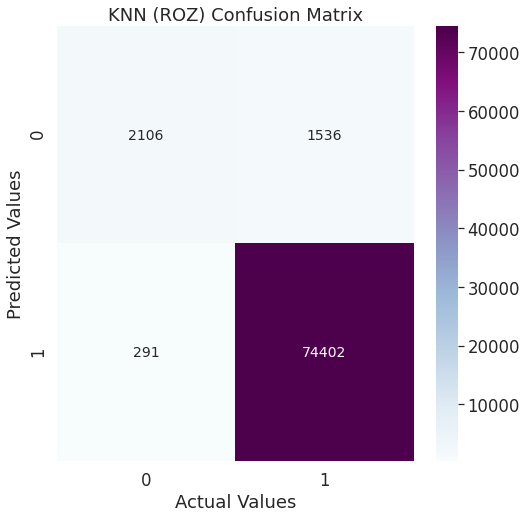

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

knnMatrix = confusion_matrix(ytest, knn_roz_predict)
plt.subplots(figsize=(8,8))

sns.heatmap(knnMatrix, annot=True, fmt='d', cmap="BuPu", annot_kws={'fontsize':14})
plt.title("KNN (ROZ) Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

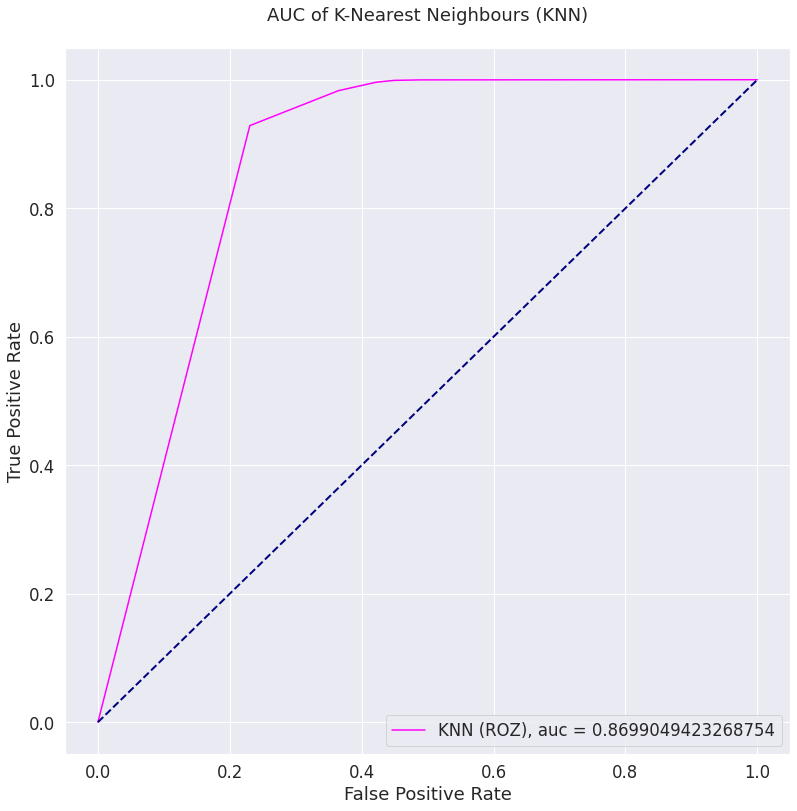

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

y_pred_proba = knn_roz.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
knn_auc = metrics.roc_auc_score(ytest, y_pred_proba) 

plt.plot(fpr, tpr, label="KNN (ROZ), auc = " + str(knn_auc), color='magenta')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc = 4)

plt.title("AUC of K-Nearest Neighbours (KNN)\n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### Standardization on Dataset

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train_stand = Xtrain.copy()
X_test_stand = Xtest.copy()

# Standardization
scaler = StandardScaler()
X_train_stand = scaler.fit_transform(X_train_stand)
X_test_stand = scaler.transform(X_test_stand)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn_roz_stand = KNeighborsClassifier(n_neighbors = 5)
# Train model
knn_roz_stand_model = knn_roz_stand.fit(X_train_stand, ytrain)
# Predict model response
knn_roz_stand_predict = knn_roz_stand_model.predict(X_test_stand)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

KNNaccScore_roz_stand = accuracy_score(ytest, knn_roz_stand_predict)
KNNpreScore_roz_stand = precision_score(ytest, knn_roz_stand_predict)
KNNrecScore_roz_stand = recall_score(ytest, knn_roz_stand_predict)
KNNf1Score_roz_stand = f1_score(ytest, knn_roz_stand_predict)

print("=== KNN Algorithm (ROZ_Standardized) ===")
print("Accuracy : %f" %KNNaccScore_roz_stand)
print("Precision: %f" %KNNpreScore_roz_stand)
print("Recall   : %f" %KNNrecScore_roz_stand)
print("F1-Score : %f" %KNNf1Score_roz_stand)
print("===                                     ===\n")

print(classification_report(ytest, knn_roz_stand_predict))

=== KNN Algorithm (ROZ_Standardized) ===
Accuracy : 0.976843
Precision: 0.979840
Recall   : 0.996211
F1-Score : 0.987958
===                                     ===

              precision    recall  f1-score   support

           0       0.88      0.58      0.70      3642
           1       0.98      1.00      0.99     74693

    accuracy                           0.98     78335
   macro avg       0.93      0.79      0.84     78335
weighted avg       0.98      0.98      0.97     78335



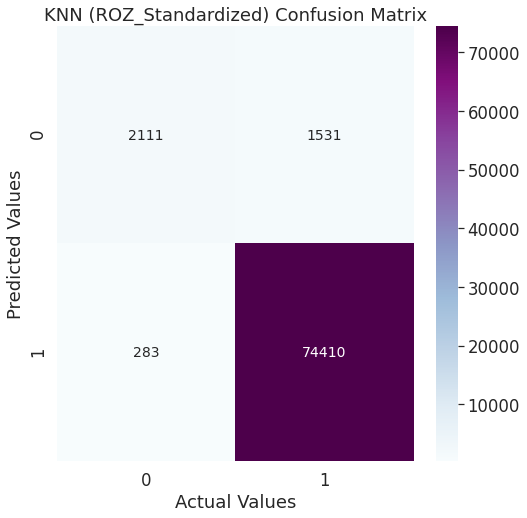

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

knnMatrix = confusion_matrix(ytest, knn_roz_stand_predict)
plt.subplots(figsize=(8,8))

sns.heatmap(knnMatrix, annot=True, fmt='d', cmap="BuPu", annot_kws={'fontsize':14})
plt.title("KNN (ROZ_Standardized) Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

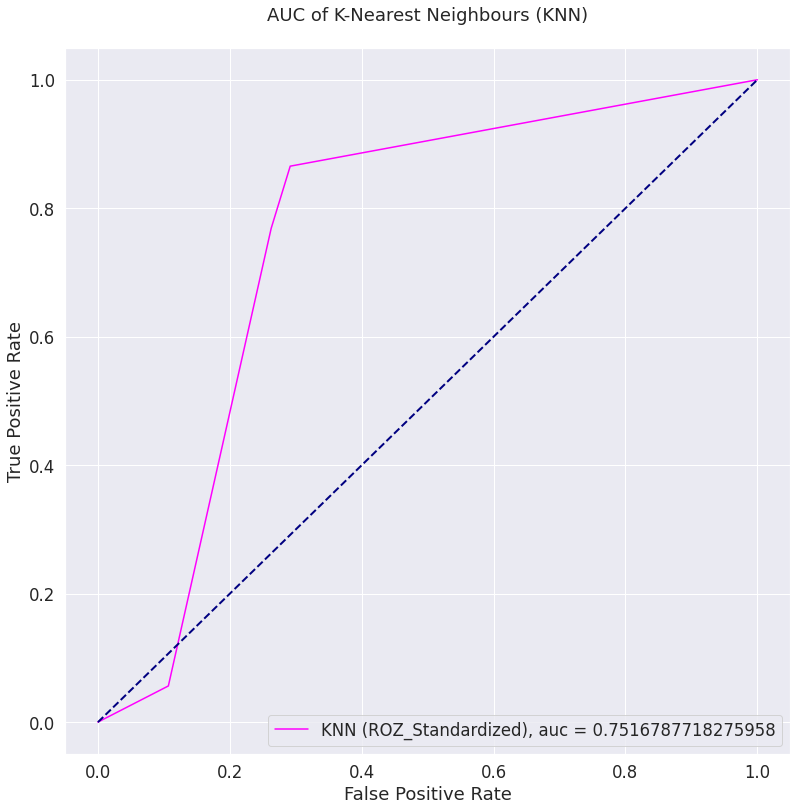

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

y_pred_proba = knn_roz_stand.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
knn_auc = metrics.roc_auc_score(ytest, y_pred_proba) 

plt.plot(fpr, tpr, label="KNN (ROZ_Standardized), auc = " + str(knn_auc), color='magenta')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc = 4)

plt.title("AUC of K-Nearest Neighbours (KNN)\n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### Normalization on Dataset

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_train_norm = Xtrain.copy()
X_test_norm = Xtest.copy()

# Normalization
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train_norm)
X_test_norm = scaler.transform(X_test_norm)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn_roz_norm = KNeighborsClassifier(n_neighbors = 5)
# Train model
knn_roz_norm_model = knn_roz_norm.fit(X_train_norm, ytrain)
# Predict model response
knn_roz_norm_predict = knn_roz_norm_model.predict(X_test_norm)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

KNNaccScore_roz_norm = accuracy_score(ytest, knn_roz_norm_predict)
KNNpreScore_roz_norm = precision_score(ytest, knn_roz_norm_predict)
KNNrecScore_roz_norm = recall_score(ytest, knn_roz_norm_predict)
KNNf1Score_roz_norm = f1_score(ytest, knn_roz_norm_predict)

print("=== KNN Algorithm (ROZ_Normalized) ===")
print("Accuracy : %f" %KNNaccScore_roz_norm)
print("Precision: %f" %KNNpreScore_roz_norm)
print("Recall   : %f" %KNNrecScore_roz_norm)
print("F1-Score : %f" %KNNf1Score_roz_norm)
print("===                                   ===\n")

print(classification_report(ytest, knn_roz_norm_predict))

=== KNN Algorithm (ROZ_Normalized) ===
Accuracy : 0.976690
Precision: 0.979824
Recall   : 0.996064
F1-Score : 0.987877
===                                   ===

              precision    recall  f1-score   support

           0       0.88      0.58      0.70      3642
           1       0.98      1.00      0.99     74693

    accuracy                           0.98     78335
   macro avg       0.93      0.79      0.84     78335
weighted avg       0.98      0.98      0.97     78335



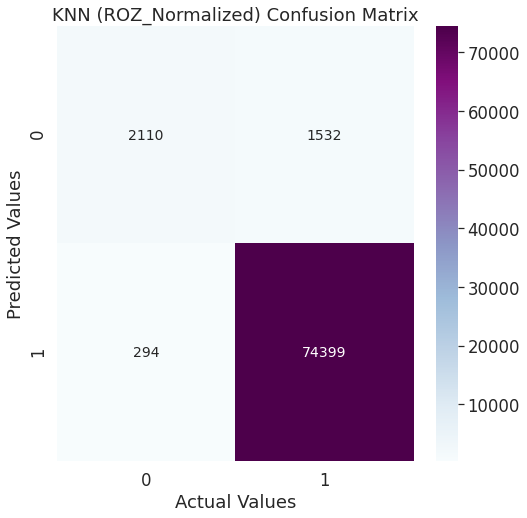

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

knnMatrix = confusion_matrix(ytest, knn_roz_norm_predict)
plt.subplots(figsize=(8,8))

sns.heatmap(knnMatrix, annot=True, fmt='d', cmap="BuPu", annot_kws={'fontsize':14})
plt.title("KNN (ROZ_Normalized) Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

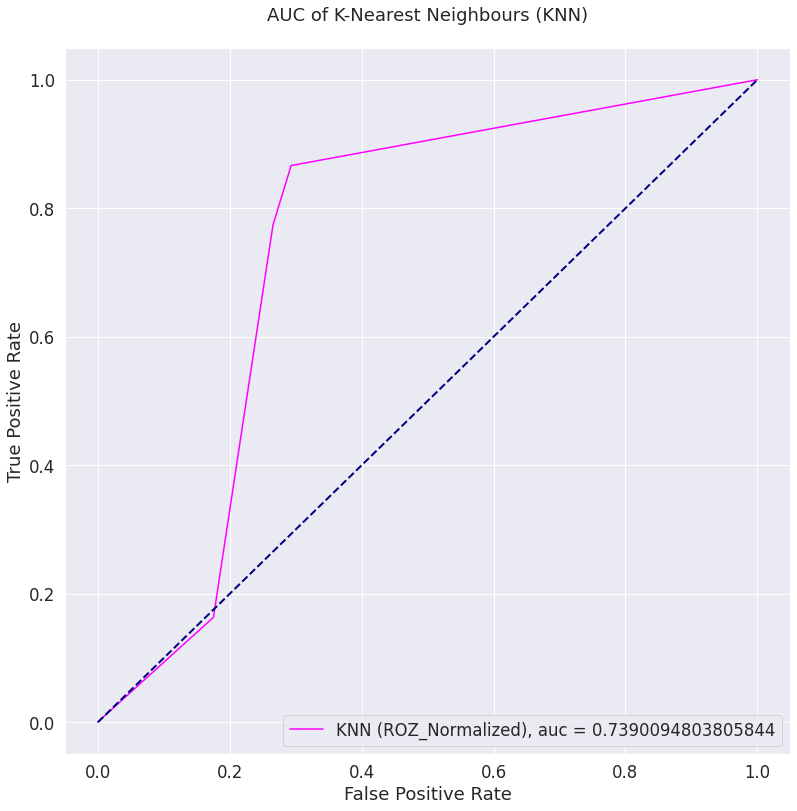

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

y_pred_proba = knn_roz_norm.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
knn_auc = metrics.roc_auc_score(ytest, y_pred_proba) 

plt.plot(fpr, tpr, label="KNN (ROZ_Normalized), auc = " + str(knn_auc), color='magenta')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc = 4)

plt.title("AUC of K-Nearest Neighbours (KNN)\n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### Combination

In [ ]:
from sklearn.metrics import mean_squared_error

roz_rmse = []

# original training and testing data
roz_rmse.append( np.sqrt(mean_squared_error(ytest, knn_roz_predict)) )
# standardized training and testing data
roz_rmse.append( np.sqrt(mean_squared_error(ytest, knn_roz_stand_predict)) )
# normalized training and testing data
roz_rmse.append( np.sqrt(mean_squared_error(ytest, knn_roz_norm_predict)) )

# visualizing rmse result
knn_roz_rmse = pd.DataFrame({'ROZ_RMSE':roz_rmse}, index=['Original', 'Standardized', 'Normalized'])
knn_roz_rmse

,ROZ_RMSE
Original,0.152718
Standardized,0.152174
Normalized,0.152677


# **Clear Outlier replace by normal mean**

Load data

In [ ]:
#Clean Outlier missing value replaced by normal mean
Dfset=cleanOutlier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size= 0.25,random_state=42)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,accuracy_score
#max_features=1,n_estimators=150
rFCmodelCONM=RandomForestClassifier(max_features=1,n_estimators=150)
rFCmodelCONM.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,classification_report
# Visualizing Confusion Matrix using Heatmap
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

ypred = rFCmodelCONM.predict(Xtest)

rFpreScoreCONM=precision_score(ytest,ypred)
rFaccScoreCONM=accuracy_score(ytest,ypred)
rFrecScoreCONM=recall_score(ytest,ypred)
rFf1ScoreCONM = f1_score(ytest, ypred)
print("Precision_Score: ", rFpreScoreCONM)
print("Accurancy_Score: ", rFaccScoreCONM)
print("Recall_Score: ", rFrecScoreCONM)
print("F1_Score: ", rFf1ScoreCONM)
print(classification_report(ytest, ypred))

Precision_Score:  0.9796057908508764
Accurancy_Score:  0.9777366439011936
Recall_Score:  0.997416089861165
F1_Score:  0.9884307169771268
              precision    recall  f1-score   support

           0       0.92      0.57      0.71      3642
           1       0.98      1.00      0.99     74693

    accuracy                           0.98     78335
   macro avg       0.95      0.79      0.85     78335
weighted avg       0.98      0.98      0.98     78335



## Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} 
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(Xtrain,ytrain)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.9568854737734112


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score

clf_D2 = LogisticRegression(penalty = 'l2', C = 0.001).fit(Xtrain,ytrain)
linear_predict_D2 = clf_D2.predict(Xtest)

print('Logistic Regression test Accuracy: {:.2f}%'.format(clf_D2.score(Xtest,ytest)))
print('Logistic Regression training Accuracy: {:.2f}%'.format(clf_D2.score(Xtrain,ytrain)))

Logistic Regression test Accuracy: 0.96%
Logistic Regression training Accuracy: 0.96%


In [ ]:
LGD2preScore=precision_score(ytest,linear_predict_D2)
LGD2accScore=accuracy_score(ytest,linear_predict_D2)
LGD2recScore=recall_score(ytest,linear_predict_D2)
LGD2f1Score = f1_score(ytest, linear_predict_D2)
print("Precision_Score: ", LGD2preScore)
print("Accuracy_Score: ", LGD2accScore)
print("Recall_Score: ", LGD2recScore)
print("F1-Score :", LGD2f1Score)

Precision_Score:  0.9562395175848516
Accuracy_Score:  0.9563158230675943
Recall_Score:  0.9999464474582624
F1-Score : 0.9776047120418849


In [ ]:
print(classification_report(ytest, linear_predict_D2))

              precision    recall  f1-score   support

           0       0.98      0.06      0.12      3642
           1       0.96      1.00      0.98     74693

    accuracy                           0.96     78335
   macro avg       0.97      0.53      0.55     78335
weighted avg       0.96      0.96      0.94     78335



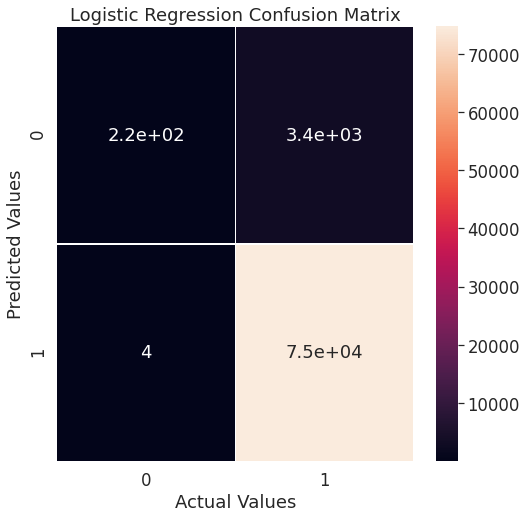

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
LG = confusion_matrix(ytest,linear_predict_D2)
plt.subplots(figsize=(8,8))

sns.heatmap(LG,annot=True,linewidths=0.5)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

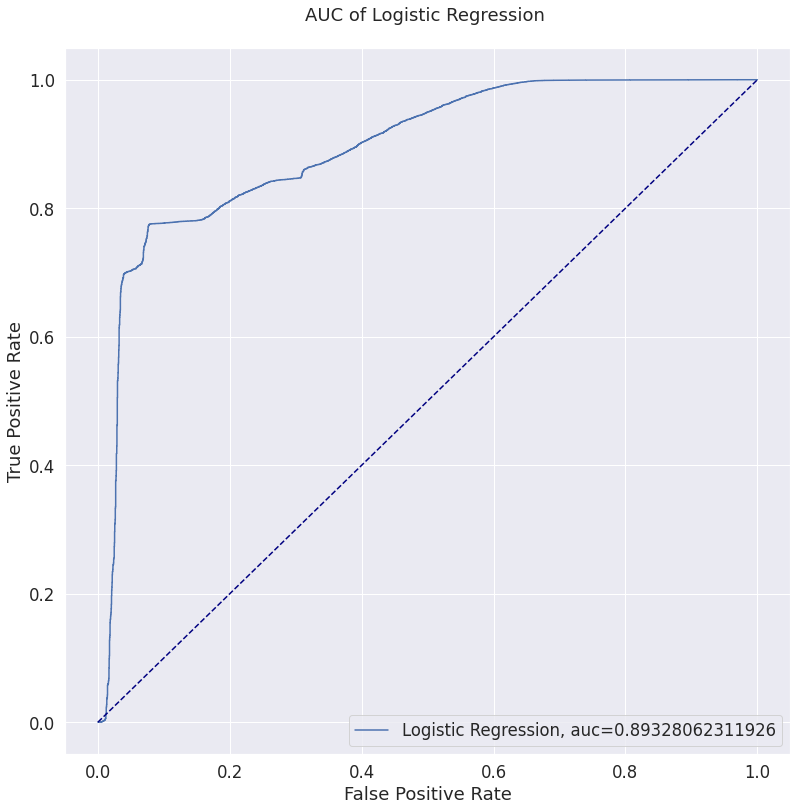

AUC: 0.893


In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_proba = clf_D2.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc=4)
plt.title("AUC of Logistic Regression \n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

auc = roc_auc_score(ytest, y_pred_proba)
print('AUC: %.3f' % auc)

## Support Vector Machine (SVM)


In [ ]:
from sklearn.svm import SVC
svmModel_D2 = SVC(kernel='rbf', C=1,probability=True).fit(Xtrain, ytrain)
svm_predict_D2 = svmModel_D1.predict(Xtest)

print('SVM test Accuracy: {:.2f}%'.format(svmModel_D2.score(Xtest,ytest)))
print('SVM training Accuracy: {:.2f}%'.format(svmModel_D2.score(Xtrain,ytrain)))

SVM test Accuracy: 0.97%
SVM training Accuracy: 0.97%


In [ ]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,classification_report,f1_score,confusion_matrix

SVMD2preScore=precision_score(ytest,svm_predict_D2)
SVMD2accScore=accuracy_score(ytest,svm_predict_D2)
SVMD2recScore=recall_score(ytest,svm_predict_D2)
SVMD2f1Score = f1_score(ytest, svm_predict_D2)
print("Precision_Score: ", SVMD2preScore)
print("Accuracy_Score: ", SVMD2accScore)
print("Recall_Score: ", SVMD2recScore)
print("F1-Score :", SVMD2f1Score)

Precision_Score:  0.9680949423859795
Accuracy_Score:  0.9125295206484968
Recall_Score:  0.9392178651279236
F1-Score : 0.953437801546637


In [ ]:
print(classification_report(ytest, svm_predict_D2))

              precision    recall  f1-score   support

           0       0.23      0.37      0.28      3642
           1       0.97      0.94      0.95     74693

    accuracy                           0.91     78335
   macro avg       0.60      0.65      0.62     78335
weighted avg       0.93      0.91      0.92     78335



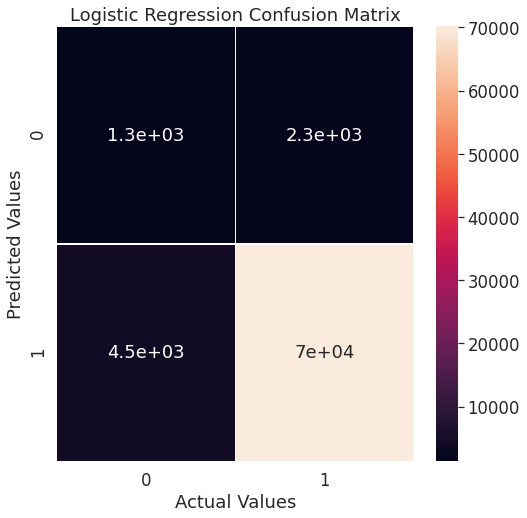

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
svmMatrix = confusion_matrix(ytest,svm_predict_D2)
plt.subplots(figsize=(8,8))

sns.heatmap(svmMatrix,annot=True,linewidths=0.5)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

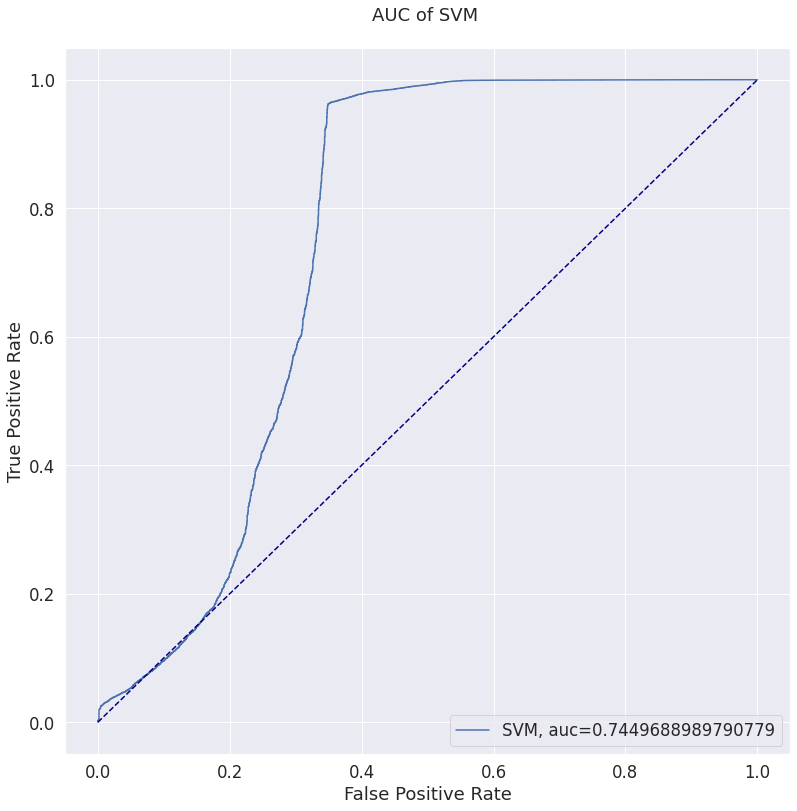

AUC: 0.745


In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_proba = svmModel_D2.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr,tpr,label="SVM, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc=4)
plt.title("AUC of SVM \n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

auc = roc_auc_score(ytest, y_pred_proba)
print('AUC: %.3f' % auc)

## Naive Bayes


In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Instantiate classifier
nbModel_d2 = GaussianNB()

#Train the model
nbModel_d2.fit(Xtrain, ytrain)

#Predict data
nbModel_y_pred_d2 = nbModel_d2.predict(Xtest)

In [ ]:
#Evaluation of model
from sklearn.metrics import precision_score,accuracy_score,recall_score,classification_report

NBpreScore_d2=precision_score(ytest,nbModel_y_pred_d2)
NBaccScore_d2=accuracy_score(ytest,nbModel_y_pred_d2)
NBrecScore_d2=recall_score(ytest,nbModel_y_pred_d2)
NBf1Score_d2=f1_score(ytest,nbModel_y_pred_d2)
print("Precision_Score: ", NBpreScore_d2)
print("Accurancy_Score: ", NBaccScore_d2)
print("Recall_Score: ", NBrecScore_d2)
print("F1_Score: ", NBf1Score_d2)
print('Accuracy of naive bayes classifier on training set: {:.2f}%'
     .format(nbModel_d2.score(Xtrain, ytrain)))
print('Accuracy of naive bayes classifier on test set: {:.2f}%'
     .format(nbModel_d2.score(Xtest, ytest)))

Precision_Score:  0.9833040130115843
Accurancy_Score:  0.7899917023042063
Recall_Score:  0.793220248216031
F1_Score:  0.8780928809088012
Accuracy of naive bayes classifier on training set: 0.79%
Accuracy of naive bayes classifier on test set: 0.79%


In [ ]:
#Classification report
print(classification_report(ytest,nbModel_y_pred_d2))

              precision    recall  f1-score   support

           0       0.15      0.72      0.24      3642
           1       0.98      0.79      0.88     74693

    accuracy                           0.79     78335
   macro avg       0.56      0.76      0.56     78335
weighted avg       0.94      0.79      0.85     78335



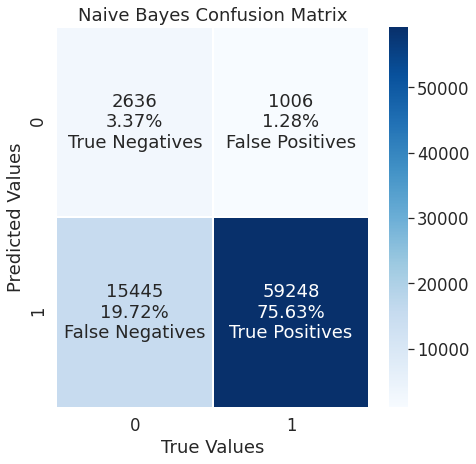

In [ ]:
#Confusion Matrix
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

nb_cm = confusion_matrix(ytest,nbModel_y_pred_d2)

plt.subplots(figsize=(7,7))

nb_group_names = ["True Negatives","False Positives","False Negatives","True Positives"]
nb_group_counts = ["{0:0.0f}".format(value) for value in
                nb_cm.flatten()]
nb_group_percentages = ["{0:.2%}".format(value) for value in
                     nb_cm.flatten()/np.sum(nb_cm)]

nb_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(nb_group_counts,nb_group_percentages,nb_group_names)]
nb_labels = np.asarray(nb_labels).reshape(2,2)

#to remove the scientific value
sns.heatmap(nb_cm,annot= nb_labels,fmt="",linewidths=0.5,cmap = "Blues")
sns.set(font_scale=1.5)

plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.show()


## K-Nearest Neighbours (KNN)

In [ ]:
# Clean Outlier missing value replaced by normal mean
Dfset = cleanOutlier

X = Dfset.drop('Machine result', axis=1)
y = Dfset['Machine result']

### Original Dataset

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn_conm = KNeighborsClassifier(n_neighbors = 5)
# Train model
knn_conm_model = knn_conm.fit(Xtrain, ytrain)
# Predict model response
knn_conm_predict = knn_conm_model.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

KNNaccScore_conm = accuracy_score(ytest, knn_conm_predict)
KNNpreScore_conm = precision_score(ytest, knn_conm_predict)
KNNrecScore_conm = recall_score(ytest, knn_conm_predict)
KNNf1Score_conm = f1_score(ytest, knn_conm_predict)

print("=== KNN Algorithm (CONM) ===")
print("Accuracy : %f" %KNNaccScore_conm)
print("Precision: %f" %KNNpreScore_conm)
print("Recall   : %f" %KNNrecScore_conm)
print("F1-Score : %f" %KNNf1Score_conm)
print("===                      ===\n")

print(classification_report(ytest, knn_conm_predict))

=== KNN Algorithm (CONM) ===
Accuracy : 0.995473
Precision: 0.995923
Recall   : 0.999534
F1-Score : 0.997725
===                      ===

              precision    recall  f1-score   support

           0       0.84      0.38      0.53       384
           1       1.00      1.00      1.00     57927

    accuracy                           1.00     58311
   macro avg       0.92      0.69      0.76     58311
weighted avg       0.99      1.00      0.99     58311



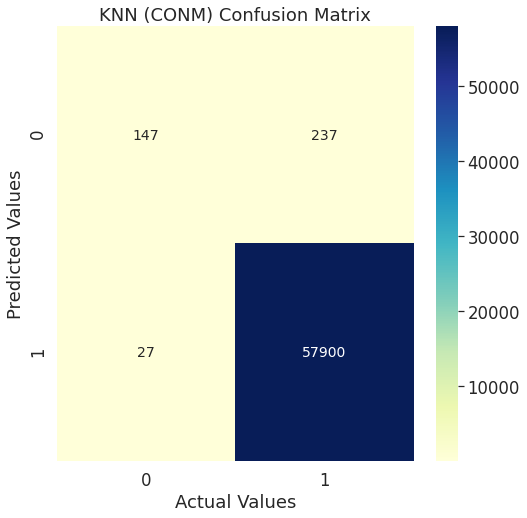

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

knnMatrix = confusion_matrix(ytest, knn_conm_predict)
plt.subplots(figsize=(8,8))

sns.heatmap(knnMatrix, annot=True, fmt='d', cmap="YlGnBu", annot_kws={'fontsize':14})
plt.title("KNN (CONM) Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

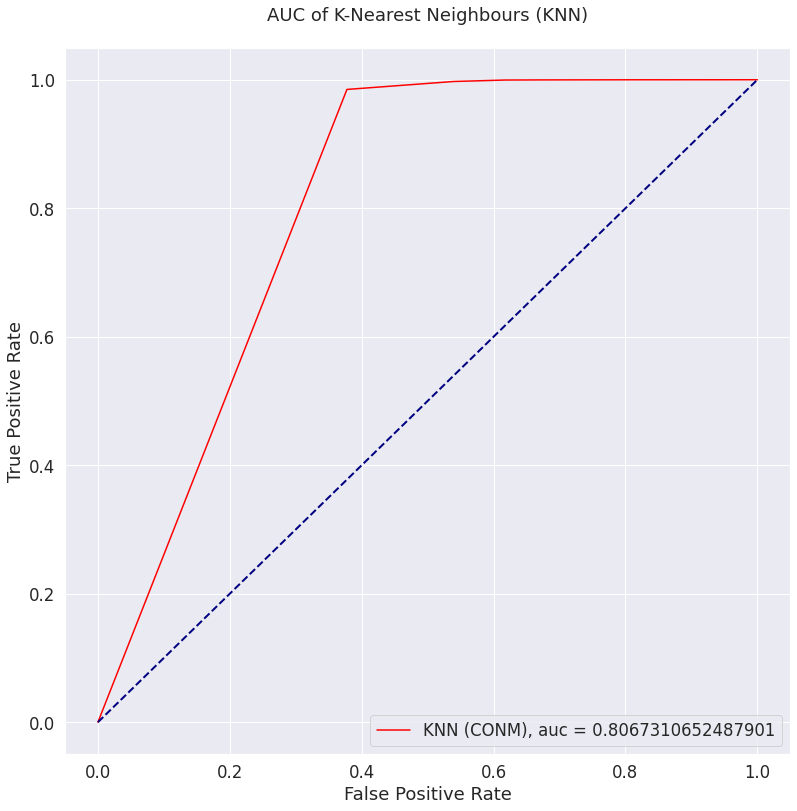

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

y_pred_proba = knn_conm.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
knn_auc = metrics.roc_auc_score(ytest, y_pred_proba) 

plt.plot(fpr, tpr, label="KNN (CONM), auc = " + str(knn_auc), color='red')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc = 4)

plt.title("AUC of K-Nearest Neighbours (KNN)\n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### Standardization on Dataset

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train_stand = Xtrain.copy()
X_test_stand = Xtest.copy()

# Standardization
scaler = StandardScaler()
X_train_stand = scaler.fit_transform(X_train_stand)
X_test_stand = scaler.transform(X_test_stand)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn_conm_stand = KNeighborsClassifier(n_neighbors = 5)
# Train model
knn_conm_stand_model = knn_conm_stand.fit(X_train_stand, ytrain)
# Predict model response
knn_conm_stand_predict = knn_conm_stand_model.predict(X_test_stand)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

KNNaccScore_conm_stand = accuracy_score(ytest, knn_conm_stand_predict)
KNNpreScore_conm_stand = precision_score(ytest, knn_conm_stand_predict)
KNNrecScore_conm_stand = recall_score(ytest, knn_conm_stand_predict)
KNNf1Score_conm_stand = f1_score(ytest, knn_conm_stand_predict)

print("=== KNN Algorithm (CONM_Standardized) ===")
print("Accuracy : %f" %KNNaccScore_conm_stand)
print("Precision: %f" %KNNpreScore_conm_stand)
print("Recall   : %f" %KNNrecScore_conm_stand)
print("F1-Score : %f" %KNNf1Score_conm_stand)
print("===                                      ===\n")

print(classification_report(ytest, knn_conm_stand_predict))

=== KNN Algorithm (CONM_Standardized) ===
Accuracy : 0.995421
Precision: 0.995923
Recall   : 0.999482
F1-Score : 0.997699
===                                      ===

              precision    recall  f1-score   support

           0       0.83      0.38      0.52       384
           1       1.00      1.00      1.00     57927

    accuracy                           1.00     58311
   macro avg       0.91      0.69      0.76     58311
weighted avg       0.99      1.00      0.99     58311



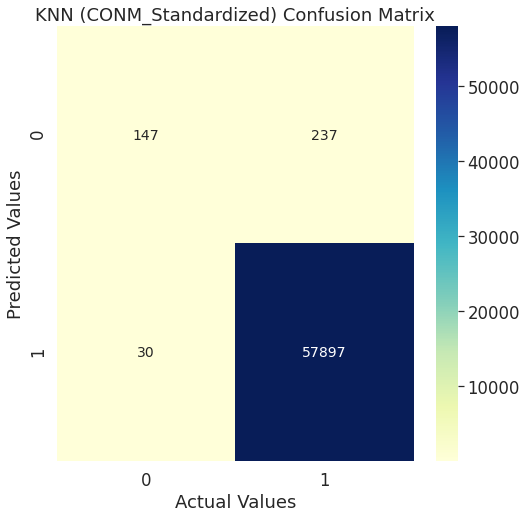

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

knnMatrix = confusion_matrix(ytest, knn_conm_stand_predict)
plt.subplots(figsize=(8,8))

sns.heatmap(knnMatrix, annot=True, fmt='d', cmap="YlGnBu", annot_kws={'fontsize':14})
plt.title("KNN (CONM_Standardized) Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

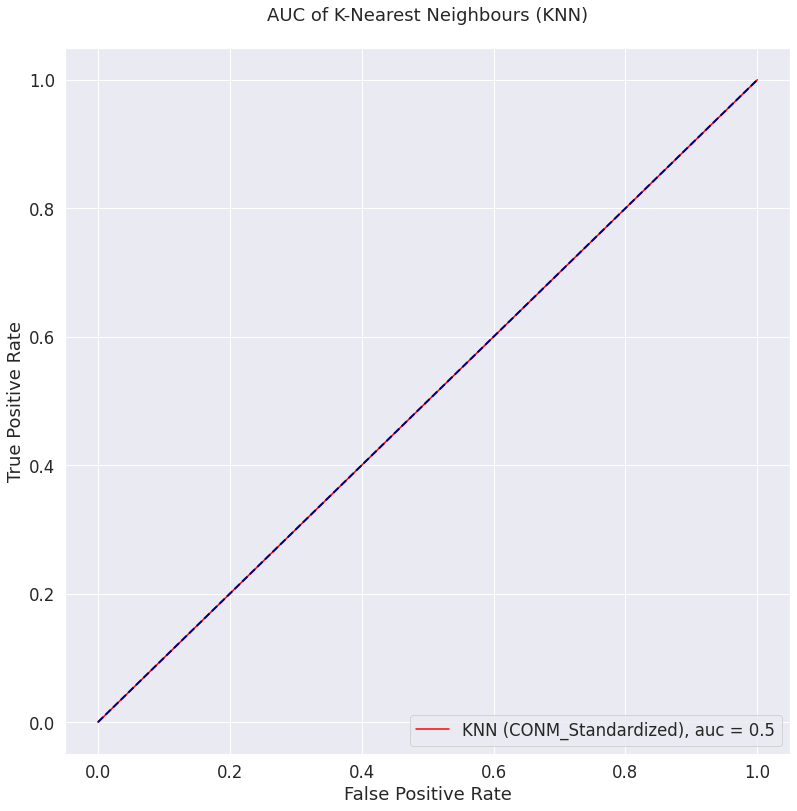

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

y_pred_proba = knn_conm_stand.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
knn_auc = metrics.roc_auc_score(ytest, y_pred_proba) 

plt.plot(fpr, tpr, label="KNN (CONM_Standardized), auc = " + str(knn_auc), color='red')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc = 4)

plt.title("AUC of K-Nearest Neighbours (KNN)\n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### Normalization on Dataset

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_train_norm = Xtrain.copy()
X_test_norm = Xtest.copy()

# Normalization
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train_norm)
X_test_norm = scaler.transform(X_test_norm)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn_conm_norm = KNeighborsClassifier(n_neighbors = 5)
# Train model
knn_conm_norm_model = knn_conm_norm.fit(X_train_norm, ytrain)
# Predict model response
knn_conm_norm_predict = knn_conm_norm_model.predict(X_test_norm)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

KNNaccScore_conm_norm = accuracy_score(ytest, knn_conm_norm_predict)
KNNpreScore_conm_norm = precision_score(ytest, knn_conm_norm_predict)
KNNrecScore_conm_norm = recall_score(ytest, knn_conm_norm_predict)
KNNf1Score_conm_norm = f1_score(ytest, knn_conm_norm_predict)

print("=== KNN Algorithm (CONM_Normalized) ===")
print("Accuracy : %f" %KNNaccScore_conm_norm)
print("Precision: %f" %KNNpreScore_conm_norm)
print("Recall   : %f" %KNNrecScore_conm_norm)
print("F1-Score : %f" %KNNf1Score_conm_norm)
print("===                                    ===\n")

print(classification_report(ytest, knn_conm_norm_predict))

=== KNN Algorithm (CONM_Normalized) ===
Accuracy : 0.995438
Precision: 0.995940
Recall   : 0.999482
F1-Score : 0.997708
===                                    ===

              precision    recall  f1-score   support

           0       0.83      0.39      0.53       384
           1       1.00      1.00      1.00     57927

    accuracy                           1.00     58311
   macro avg       0.91      0.69      0.76     58311
weighted avg       0.99      1.00      0.99     58311



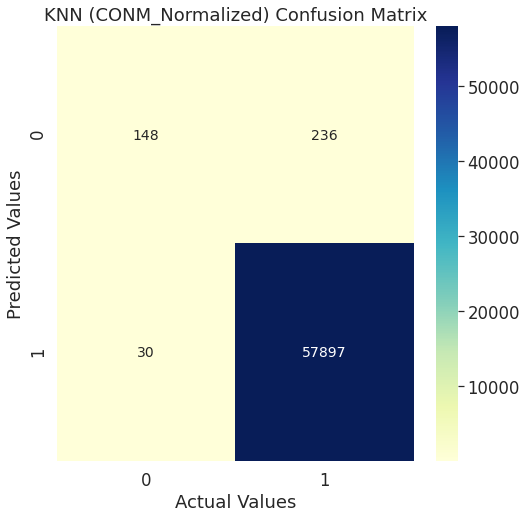

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

knnMatrix = confusion_matrix(ytest, knn_conm_norm_predict)
plt.subplots(figsize=(8,8))

sns.heatmap(knnMatrix, annot=True, fmt='d', cmap="YlGnBu", annot_kws={'fontsize':14})
plt.title("KNN (CONM_Normalized) Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

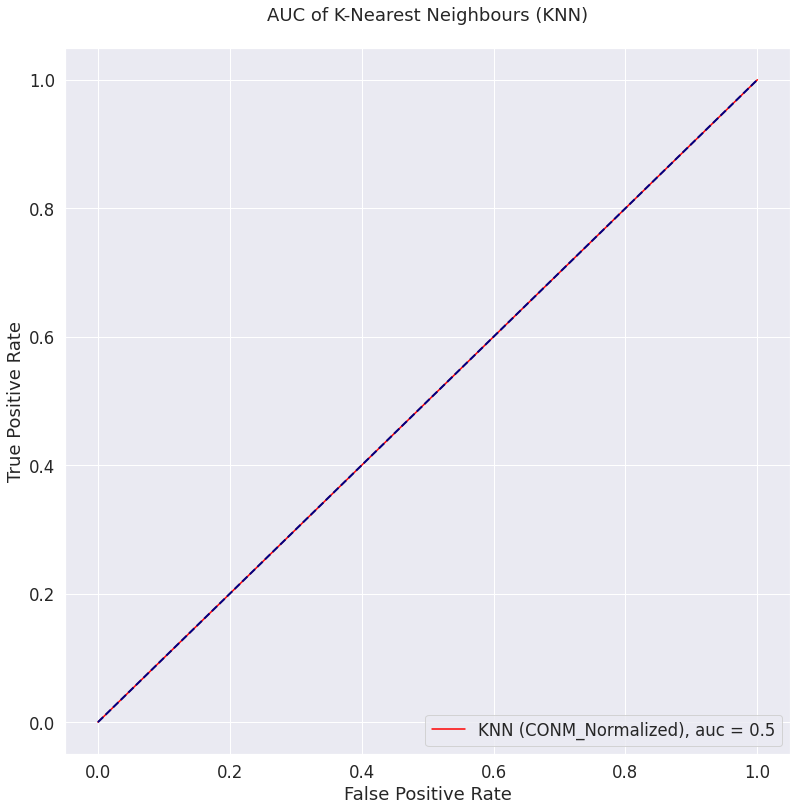

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

y_pred_proba = knn_conm_norm.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
knn_auc = metrics.roc_auc_score(ytest, y_pred_proba) 

plt.plot(fpr, tpr, label="KNN (CONM_Normalized), auc = " + str(knn_auc), color='red')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc = 4)

plt.title("AUC of K-Nearest Neighbours (KNN)\n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### Combination

In [ ]:
from sklearn.metrics import mean_squared_error

conm_rmse = []

# original training and testing data
conm_rmse.append( np.sqrt(mean_squared_error(ytest, knn_conm_predict)) )
# standardized training and testing data
conm_rmse.append( np.sqrt(mean_squared_error(ytest, knn_conm_stand_predict)) )
# normalized training and testing data
conm_rmse.append( np.sqrt(mean_squared_error(ytest, knn_conm_norm_predict)) )

# visualizing rmse result
knn_conm_rmse = pd.DataFrame({'CONM_RMSE':conm_rmse}, index=['Original', 'Standardized', 'Normalized'])
knn_conm_rmse

,CONM_RMSE
Original,0.067286
Standardized,0.067668
Normalized,0.067541


# **END OF MODELLING**

# **Grid Search - Random Forest Model**
This need to take around 4 hours

In [ ]:
from sklearn.model_selection import GridSearchCV

max_features_rf = np.arange(1,6,1)
n_estimators_rf = np.arange(10,200,20)
param_grid= dict(max_features=max_features_rf,n_estimators=n_estimators_rf)

rf= RandomForestClassifier()
grid=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)
grid.fit(Xtrain,ytrain)


KeyboardInterrupt: ignored

In [ ]:
grid.best_params_
#best param {'max_features': 1, 'n_estimators': 170}
results_df = pd.DataFrame(grid.cv_results_)
results_df = results_df.sort_values(by=['rank_test_score'])
results_df = (
    results_df
    .set_index(results_df["params"].apply(
        lambda x: "_".join(str(val) for val in x.values()))
    )
    .rename_axis('kernel')
)
results_df[
    ['params', 'rank_test_score', 'mean_test_score', 'std_test_score']
]

# **Result Evaluation**

## Remain Outlier Drop Missing Value

use "hotayiDfDropMissing"

In [ ]:
import pandas as pd
# initialise data of lists.
data = {'Accuracy':[rFaccScoreDMRO,LGD1accScore,SVMD1accScore,NBaccScore_d1,KNNaccScore_dmro],
        'Precision':[rFpreScoreDMRO, LGD1preScore,SVMD1preScore,NBpreScore_d1,KNNpreScore_dmro],
        'Recall':[rFrecScoreDMRO, LGD1recScore,SVMD1recScore,NBrecScore_d1,KNNrecScore_dmro],
        'F1 score':[rFf1ScoreDMRO, LGD1f1Score,SVMD1f1Score,NBf1Score_d1,KNNf1Score_dmro]}
# Creates pandas DataFrame.
df = pd.DataFrame(data, index =['Random Forest','Logistic Regression','SVM','Naive Bayes','KNN'])
 
# print the data
df

,Accuracy,Precision,Recall,F1 score
Random Forest,0.981394,0.981988,0.998922,0.990383
Logistic Regression,0.963627,0.963460,1.000000,0.981390
SVM,0.973858,0.973596,0.999859,0.986553
Naive Bayes,0.850297,0.996143,0.847188,0.915647
KNN,0.980495,0.982461,0.997470,0.989908


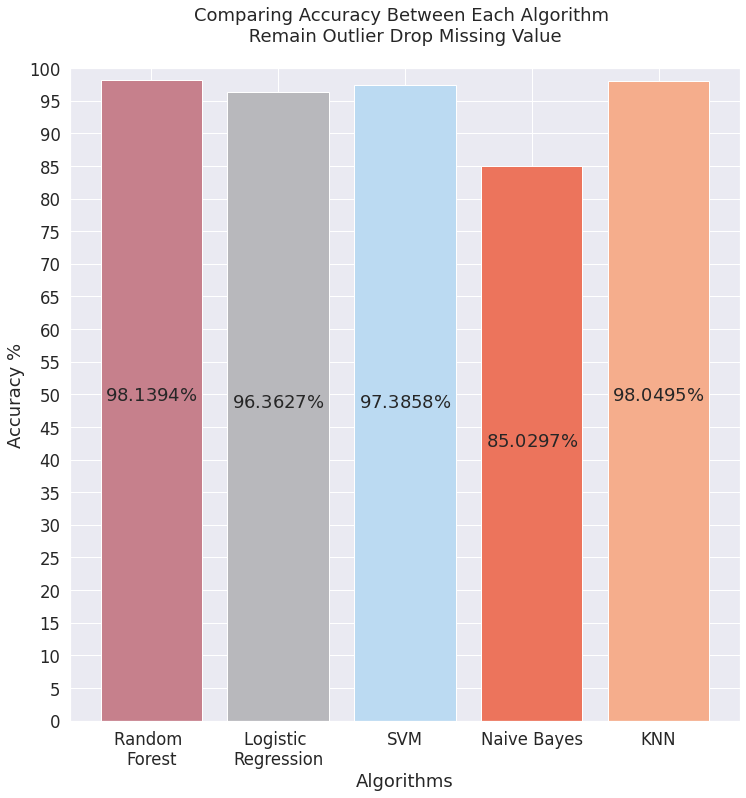

[98.1393815915628, 96.36265580057525, 97.38584611697027, 85.02966203259828, 98.0494966442953]


In [ ]:
#Compare accuracy 
import matplotlib.pyplot as plt

#function to add label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, '${:.4f}$%'.format(y[i]), ha = 'center')
        
name = ['Random \nForest','Logistic \nRegression','SVM','Naive Bayes','KNN']
accurateBar = [rFaccScoreDMRO *100,LGD1accScore*100,SVMD1accScore*100,NBaccScore_d1*100,KNNaccScore_dmro*100]

plt.figure(figsize=(12,12)) 
plt.grid(True)
plt.bar(x=name, height=accurateBar,color=['#C6808C', '#B8B8BC', '#BBDAF2', '#EC745C','#F5AD8C'])

# calling the function to add value labels
addlabels(name, accurateBar)
plt.xticks()
plt.ylim((0,100))

plt.yticks(np.arange(0,105,5))
plt.title("Comparing Accuracy Between Each Algorithm \n Remain Outlier Drop Missing Value \n") 
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.show()
print(accurateBar)

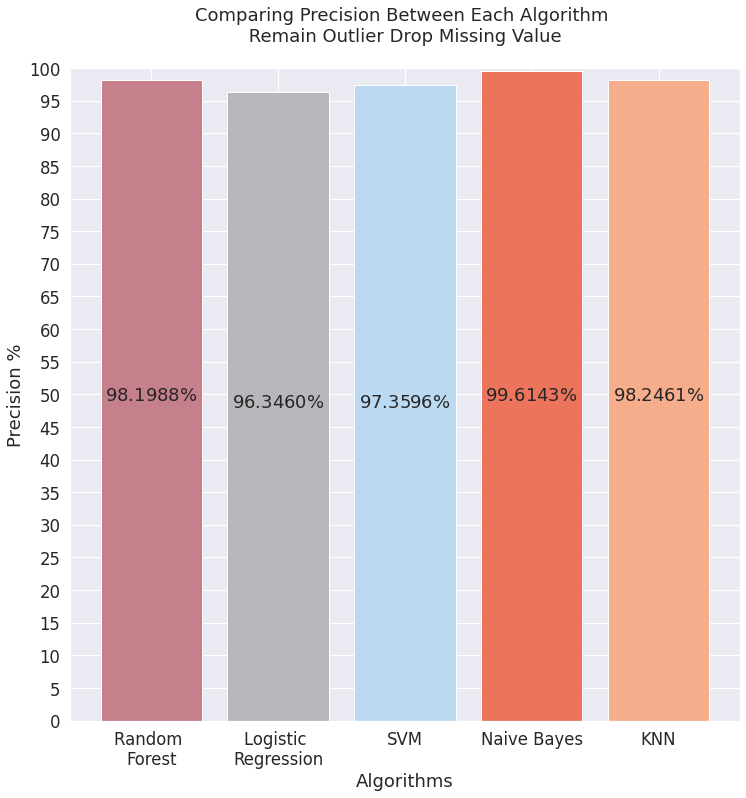

[98.19882071125853, 96.34601492896702, 97.35957534184068, 99.6143038183922, 98.24609987999631]


In [ ]:
#Compare precision 
import matplotlib.pyplot as plt

name = ['Random \nForest','Logistic \nRegression','SVM','Naive Bayes','KNN']
accurateBar = [rFpreScoreDMRO*100,LGD1preScore*100,SVMD1preScore*100,NBpreScore_d1*100,KNNpreScore_dmro*100]

plt.figure(figsize=(12,12)) 
plt.grid(True)
plt.bar(x=name, height=accurateBar,color=['#C6808C', '#B8B8BC', '#BBDAF2', '#EC745C','#F5AD8C'])

# calling the function to add value labels
addlabels(name, accurateBar)
plt.xticks()
plt.ylim((0,100))

plt.yticks(np.arange(0,105,5))
plt.title("Comparing Precision Between Each Algorithm \n Remain Outlier Drop Missing Value \n") 
plt.ylabel("Precision %")
plt.xlabel("Algorithms")
plt.show()
print(accurateBar)

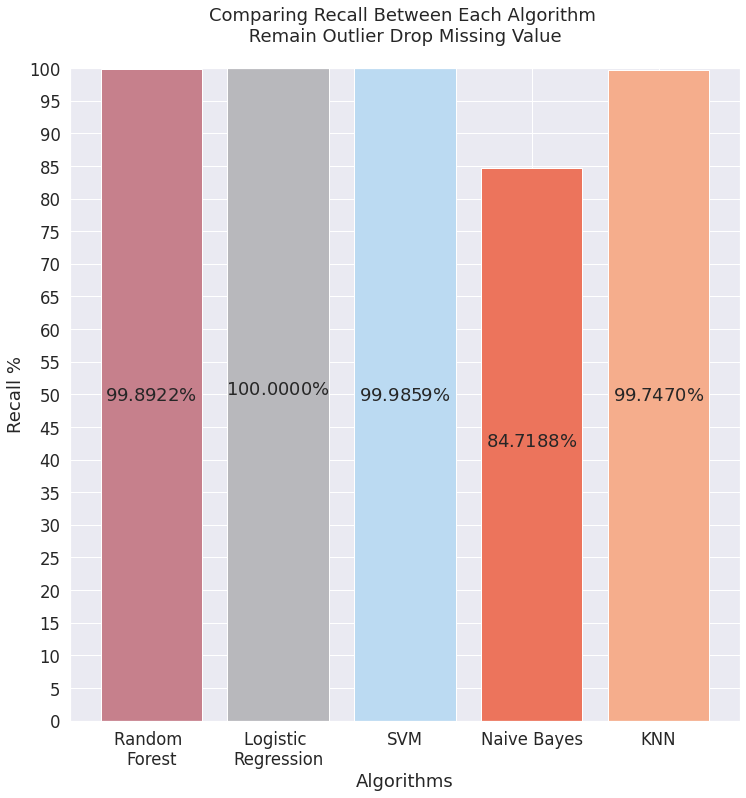

[99.89222118088098, 100.0, 99.9859418931584, 84.71883786316776, 99.74695407685098]


In [ ]:
#Compare Recall score
import matplotlib.pyplot as plt

name = ['Random \nForest','Logistic \nRegression','SVM','Naive Bayes','KNN']
accurateBar = [rFrecScoreDMRO *100,LGD1recScore*100,SVMD1recScore*100,NBrecScore_d1*100,KNNrecScore_dmro*100]

plt.figure(figsize=(12,12)) 
plt.grid(True)
plt.bar(x=name, height=accurateBar,color=['#C6808C', '#B8B8BC', '#BBDAF2', '#EC745C','#F5AD8C'])

# calling the function to add value labels
addlabels(name, accurateBar)
plt.xticks()
plt.ylim((0,100))

plt.yticks(np.arange(0,105,5))
plt.title("Comparing Recall Between Each Algorithm \n Remain Outlier Drop Missing Value \n") 
plt.ylabel("Recall %")
plt.xlabel("Algorithms")
plt.show()
print(accurateBar)

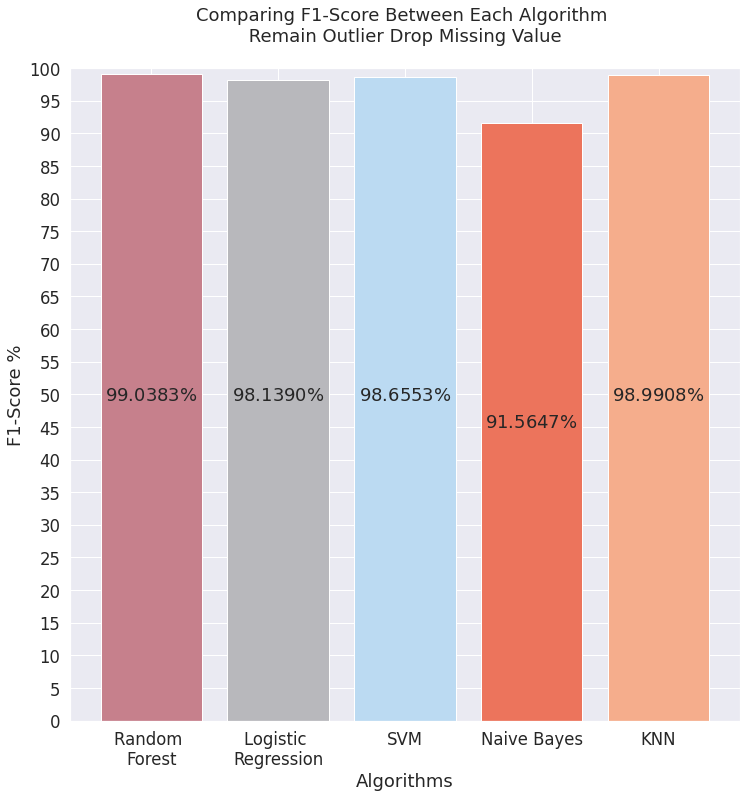

[99.03828284705446, 98.13900726614956, 98.65528215956292, 91.56473954772217, 98.99083848765288]


In [ ]:
#Compare f1 score 
import matplotlib.pyplot as plt

name = ['Random \nForest','Logistic \nRegression','SVM','Naive Bayes','KNN']
accurateBar = [rFf1ScoreDMRO *100,LGD1f1Score*100,SVMD1f1Score*100,NBf1Score_d1*100,KNNf1Score_dmro*100]

plt.figure(figsize=(12,12)) 
plt.grid(True)
plt.bar(x=name, height=accurateBar,color=['#C6808C', '#B8B8BC', '#BBDAF2', '#EC745C','#F5AD8C'])

# calling the function to add value labels
addlabels(name, accurateBar)
plt.xticks()
plt.ylim((0,100))

plt.yticks(np.arange(0,105,5))
plt.title("Comparing F1-Score Between Each Algorithm \n Remain Outlier Drop Missing Value \n") 
plt.ylabel("F1-Score %")
plt.xlabel("Algorithms")
plt.show()
print(accurateBar)

## Clear Outlier Missing Value Fill with Normal mean

use "cleanOutlier"

In [ ]:
import pandas as pd
# initialise data of lists.
data = {'Accuracy':[rFaccScoreCONM,LGD2accScore,SVMD2accScore,NBaccScore_d2,KNNaccScore_conm],
        'Precision':[rFpreScoreCONM, LGD2preScore,SVMD2preScore,NBpreScore_d2,KNNpreScore_conm],
        'Recall':[rFrecScoreCONM, LGD2recScore,SVMD2recScore,NBrecScore_d2,KNNrecScore_conm],
        'F1 score':[rFf1ScoreCONM, LGD2f1Score,SVMD2f1Score,NBf1Score_d2,KNNf1Score_conm]}
# Creates pandas DataFrame.
df = pd.DataFrame(data, index =['Random Forest','Logistic Regression','SVM','Naive Bayes','KNN'])
 
# print the data
df

,Accuracy,Precision,Recall,F1 score
Random Forest,0.977737,0.979606,0.997416,0.988431
Logistic Regression,0.956316,0.956240,0.999946,0.977605
SVM,0.912530,0.968095,0.939218,0.953438
Naive Bayes,0.789992,0.983304,0.793220,0.878093
KNN,0.995473,0.995923,0.999534,0.997725


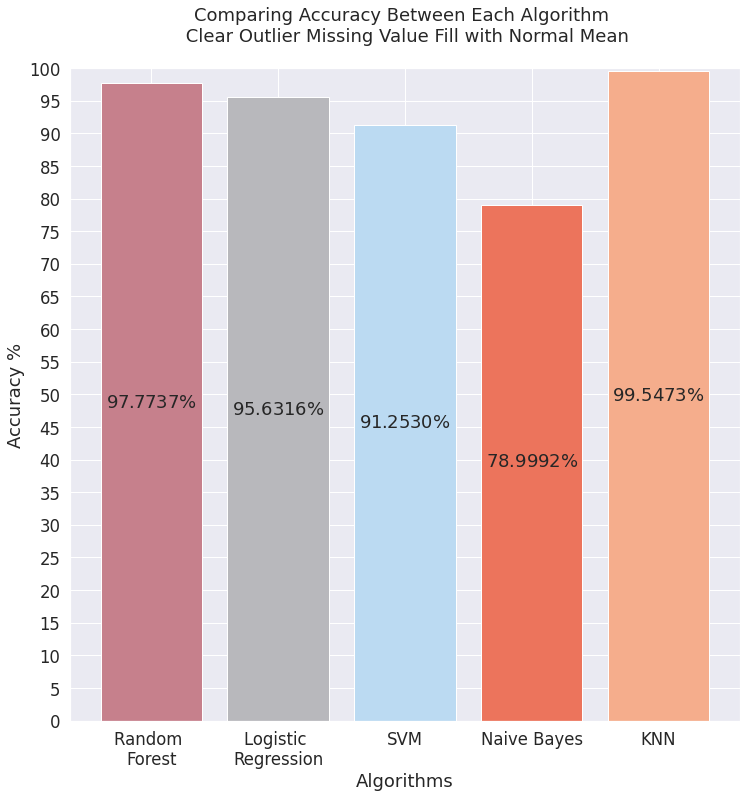

[97.77366439011936, 95.63158230675943, 91.25295206484968, 78.99917023042063, 99.54725523486134]


In [ ]:
#Compare accuracy 
import matplotlib.pyplot as plt
  
name = ['Random \nForest','Logistic \nRegression','SVM','Naive Bayes','KNN']
accurateBar = [rFaccScoreCONM *100,LGD2accScore*100,SVMD2accScore*100,NBaccScore_d2*100,KNNaccScore_conm*100]

plt.figure(figsize=(12,12)) 
plt.grid(True)
plt.bar(x=name, height=accurateBar,color=['#C6808C', '#B8B8BC', '#BBDAF2', '#EC745C','#F5AD8C'])

# calling the function to add value labels
addlabels(name, accurateBar)

plt.xticks()
plt.ylim((0,100))

plt.yticks(np.arange(0,105,5))
plt.title("Comparing Accuracy Between Each Algorithm \n Clear Outlier Missing Value Fill with Normal Mean\n") 
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.show()
print(accurateBar)

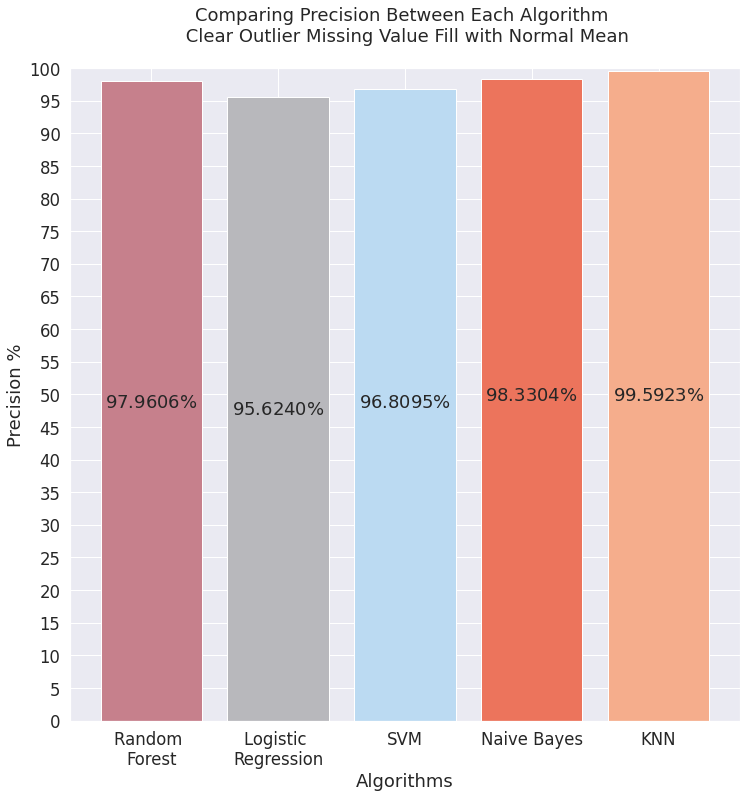

[97.96057908508764, 95.62395175848516, 96.80949423859795, 98.33040130115843, 99.59234222612106]


In [ ]:
#Compare precision 
import matplotlib.pyplot as plt

name = ['Random \nForest','Logistic \nRegression','SVM','Naive Bayes','KNN']
accurateBar = [rFpreScoreCONM*100,LGD2preScore*100,SVMD2preScore*100,NBpreScore_d2*100,KNNpreScore_conm*100]

plt.figure(figsize=(12,12)) 
plt.grid(True)
plt.bar(x=name, height=accurateBar,color=['#C6808C', '#B8B8BC', '#BBDAF2', '#EC745C','#F5AD8C'])

# calling the function to add value labels
addlabels(name, accurateBar)

plt.xticks()
plt.ylim((0,100))

plt.yticks(np.arange(0,105,5))
plt.title("Comparing Precision Between Each Algorithm \n Clear Outlier Missing Value Fill with Normal Mean\n") 
plt.ylabel("Precision %")
plt.xlabel("Algorithms")
plt.show()
print(accurateBar)

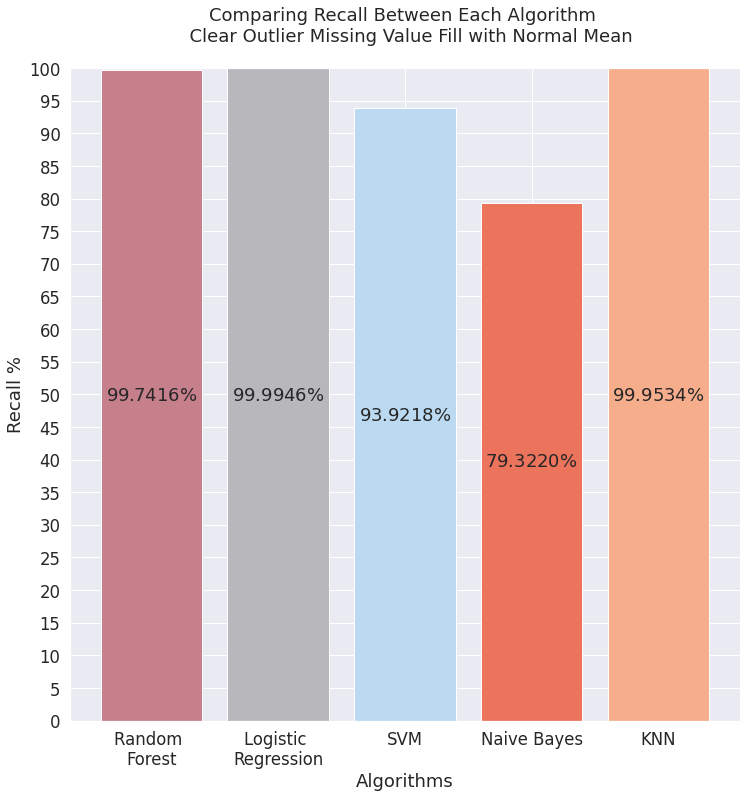

[99.7416089861165, 99.99464474582625, 93.92178651279237, 79.3220248216031, 99.9533896110622]


In [ ]:
#Compare Recall score
import matplotlib.pyplot as plt

name = ['Random \nForest','Logistic \nRegression','SVM','Naive Bayes','KNN']
accurateBar = [rFrecScoreCONM *100,LGD2recScore*100,SVMD2recScore*100,NBrecScore_d2*100,KNNrecScore_conm*100]

plt.figure(figsize=(12,12)) 
plt.grid(True)
plt.bar(x=name, height=accurateBar,color=['#C6808C', '#B8B8BC', '#BBDAF2', '#EC745C','#F5AD8C'])

# calling the function to add value labels
addlabels(name, accurateBar)
plt.xticks()
plt.ylim((0,100))

plt.yticks(np.arange(0,105,5))
plt.title("Comparing Recall Between Each Algorithm \n  Clear Outlier Missing Value Fill with Normal Mean\n") 
plt.ylabel("Recall %")
plt.xlabel("Algorithms")
plt.show()
print(accurateBar)

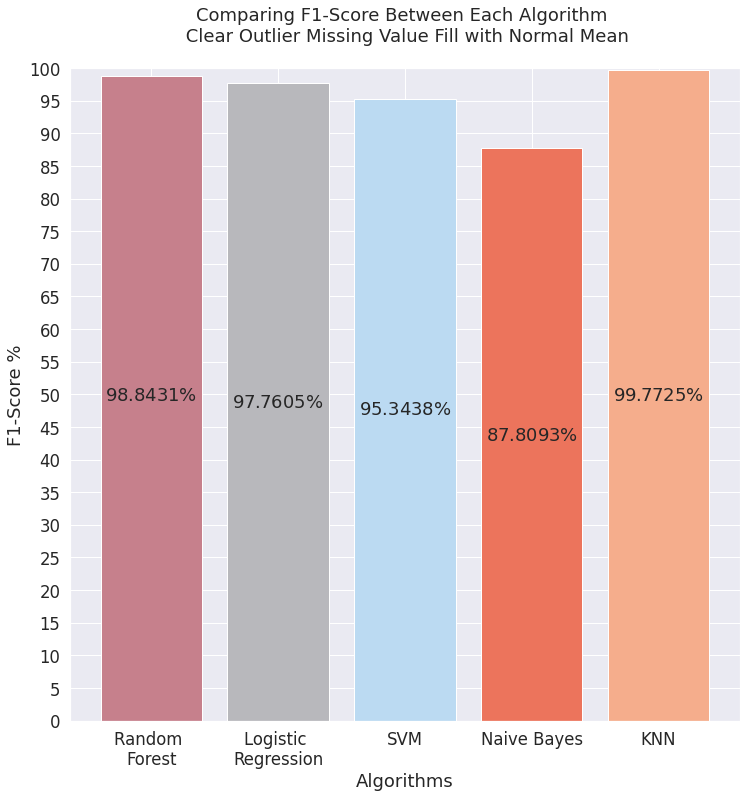

[98.84307169771269, 97.76047120418849, 95.3437801546637, 87.80928809088012, 99.77253928866833]


In [ ]:
#Compare f1 score 

import matplotlib.pyplot as plt
name = ['Random \nForest','Logistic \nRegression','SVM','Naive Bayes','KNN']
accurateBar = [rFf1ScoreCONM *100,LGD2f1Score*100,SVMD2f1Score*100,NBf1Score_d2*100,KNNf1Score_conm*100]

plt.figure(figsize=(12,12)) 
plt.grid(True)
plt.bar(x=name, height=accurateBar,color=['#C6808C', '#B8B8BC', '#BBDAF2', '#EC745C','#F5AD8C'])

# calling the function to add value labels
addlabels(name, accurateBar)

plt.xticks()
plt.ylim((0,100))

plt.yticks(np.arange(0,105,5))
plt.title("Comparing F1-Score Between Each Algorithm \n Clear Outlier Missing Value Fill with Normal Mean\n") 
plt.ylabel("F1-Score %")
plt.xlabel("Algorithms")
plt.show()
print(accurateBar)

## Remain Outlier Missing Value Fill with ZERO

use "hotayiDfZero"

In [ ]:
import pandas as pd
# initialise data of lists.
data = {'Accuracy':[rFaccScoreROZ,LGD3accScore,SVMD3accScore,NBaccScore_d3,KNNaccScore_roz],
        'Precision':[rFpreScoreROZ, LGD3preScore,SVMD3preScore,NBpreScore_d3,KNNpreScore_roz],
        'Recall':[rFrecScoreROZ, LGD3recScore,SVMD3recScore,NBrecScore_d3,KNNrecScore_roz],
        'F1 score':[rFf1ScoreROZ, LGD3f1Score,SVMD3f1Score,NBf1Score_d3,KNNf1Score_roz]}
# Creates pandas DataFrame.
df = pd.DataFrame(data, index =['Random Forest','Logistic Regression','SVM','Naive Bayes','KNN'])
 
# print the data
df

,Accuracy,Precision,Recall,F1 score
Random Forest,0.977430,0.979650,0.997041,0.988269
Logistic Regression,0.956316,0.956240,0.999946,0.977605
SVM,0.966605,0.966584,0.999531,0.982782
Naive Bayes,0.789992,0.983304,0.793220,0.878093
KNN,0.976677,0.979773,0.996104,0.987871


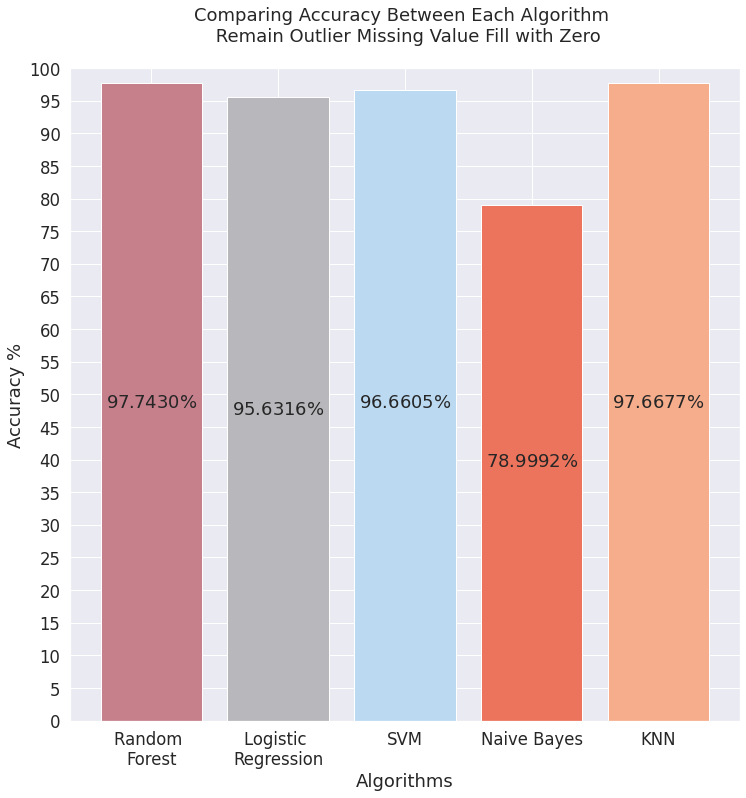

[97.74302674411183, 95.63158230675943, 96.66049658517903, 78.99917023042063, 97.66770919767664]


In [ ]:
#Compare accuracy 
import matplotlib.pyplot as plt

name = ['Random \nForest','Logistic \nRegression','SVM','Naive Bayes','KNN']
accurateBar = [rFaccScoreROZ*100,LGD3accScore*100,SVMD3accScore*100,NBaccScore_d3*100,KNNaccScore_roz*100]

plt.figure(figsize=(12,12)) 
plt.grid(True)
plt.bar(x=name, height=accurateBar,color=['#C6808C', '#B8B8BC', '#BBDAF2', '#EC745C','#F5AD8C'])

# calling the function to add value labels
addlabels(name, accurateBar)
plt.xticks()
plt.ylim((0,100))

plt.yticks(np.arange(0,105,5))
plt.title("Comparing Accuracy Between Each Algorithm \n Remain Outlier Missing Value Fill with Zero\n") 
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.show()
print(accurateBar)

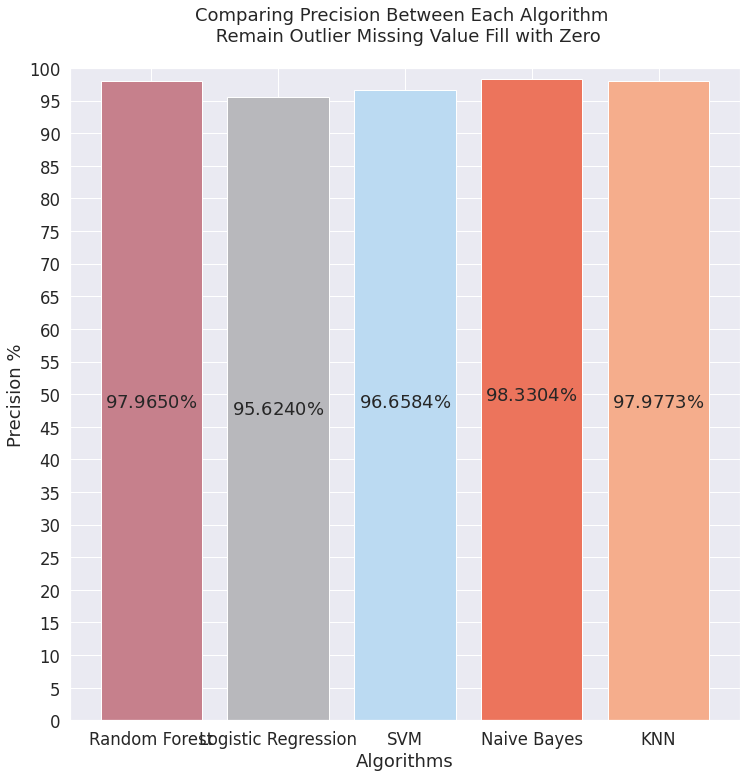

[97.96498243860088, 95.62395175848516, 96.65842385323477, 98.33040130115843, 97.97729726882457]


In [ ]:
#Compare precision 
import matplotlib.pyplot as plt
name = ['Random Forest','Logistic Regression','SVM','Naive Bayes','KNN']
accurateBar = [rFpreScoreROZ*100,LGD3preScore*100,SVMD3preScore*100,NBpreScore_d3*100,KNNpreScore_roz*100]

plt.figure(figsize=(12,12)) 
plt.grid(True)
plt.bar(x=name, height=accurateBar,color=['#C6808C', '#B8B8BC', '#BBDAF2', '#EC745C','#F5AD8C'])

# calling the function to add value labels
addlabels(name, accurateBar)
plt.xticks()
plt.ylim((0,100))

plt.yticks(np.arange(0,105,5))
plt.title("Comparing Precision Between Each Algorithm \n Remain Outlier Missing Value Fill with Zero\n") 
plt.ylabel("Precision %")
plt.xlabel("Algorithms")
plt.show()
print(accurateBar)

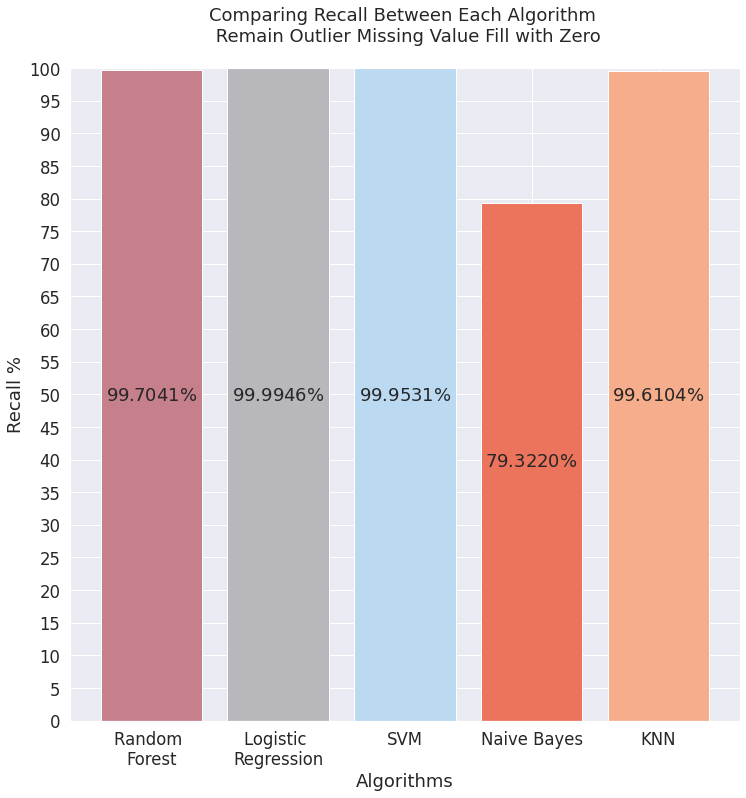

[99.70412220690025, 99.99464474582625, 99.95314152597967, 79.3220248216031, 99.6104052588596]


In [ ]:
#Compare Recall score
import matplotlib.pyplot as plt

name = ['Random \nForest','Logistic \nRegression','SVM','Naive Bayes','KNN']
accurateBar = [rFrecScoreROZ *100,LGD3recScore*100,SVMD3recScore*100,NBrecScore_d3*100,KNNrecScore_roz*100]

plt.figure(figsize=(12,12)) 
plt.grid(True)
plt.bar(x=name, height=accurateBar,color=['#C6808C', '#B8B8BC', '#BBDAF2', '#EC745C','#F5AD8C'])

# calling the function to add value labels
addlabels(name, accurateBar)
plt.xticks()
plt.ylim((0,100))

plt.yticks(np.arange(0,105,5))
plt.title("Comparing Recall Between Each Algorithm \n Remain Outlier Missing Value Fill with Zero\n") 
plt.ylabel("Recall %")
plt.xlabel("Algorithms")
plt.show()
print(accurateBar)

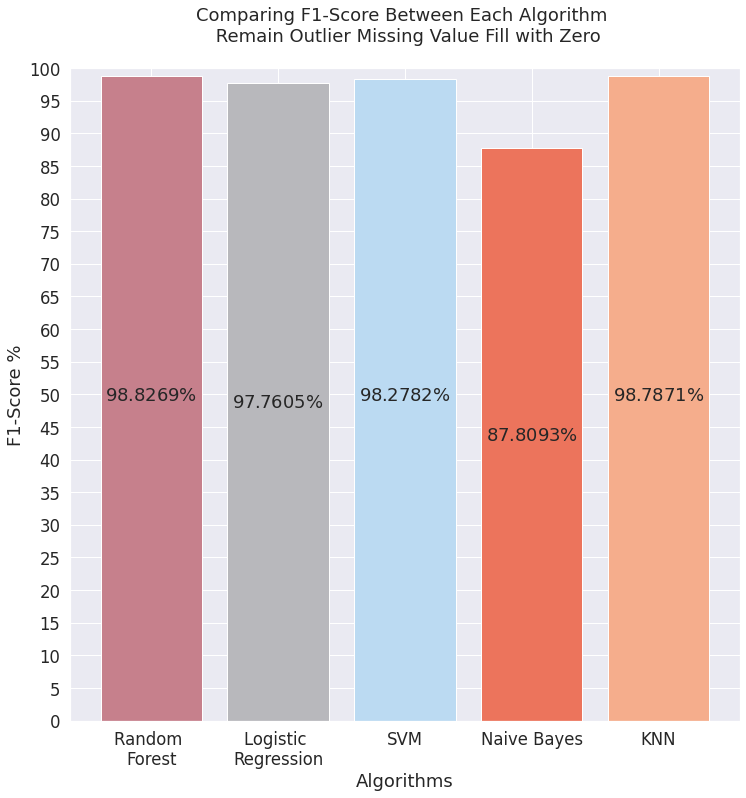

[98.82690164021446, 97.76047120418849, 98.27817707921966, 87.80928809088012, 98.78710225650764]


In [ ]:
#Compare f1 score 
import matplotlib.pyplot as plt

name = ['Random \nForest','Logistic \nRegression','SVM','Naive Bayes','KNN']
accurateBar = [rFf1ScoreROZ *100,LGD3f1Score*100,SVMD3f1Score*100,NBf1Score_d3*100,KNNf1Score_roz*100]

plt.figure(figsize=(12,12)) 
plt.grid(True)
plt.bar(x=name, height=accurateBar,color=['#C6808C', '#B8B8BC', '#BBDAF2', '#EC745C','#F5AD8C'])

# calling the function to add value labels
addlabels(name, accurateBar)
plt.xticks()
plt.ylim((0,100))

plt.yticks(np.arange(0,105,5))
plt.title("Comparing F1-Score Between Each Algorithm \n Remain Outlier Missing Value Fill with Zero\n") 
plt.ylabel("F1-Score %")
plt.xlabel("Algorithms")
plt.show()
print(accurateBar)

# **Deployment**

STORE MODEL

In [ ]:
import pickle
# drop missing value remain outlier rfmodel
# save the model to disk

#select model
storemodel=rFCmodelDMRO
filename = 'finalized_model.sav'
pickle.dump(storemodel, open(filename, 'wb'))

LOAD MODEL

In [2]:
import pickle
# load the model from disk
finalModel = pickle.load(open('finalized_model.sav', 'rb'))


C:\Users\WenZhi\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.2.post1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\WenZhi\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22.2.post1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [3]:

def prediction(p1,p2,p3,p4,p5):
  if(p1==''):
    p1=0
  if(p2==''):
    p2=0
  if(p3==''):
    p3=0
  if(p4==''):
    p4=0
  if(p5==''):
    p5=0
  
  prediction= finalModel.predict([[p1,p2,p3,p4]])
  print(prediction)
  if prediction==1:
    pred='OK'
  else:
    pred='NG'
  return pred

Values for testing

**ng**

  result=prediction(38.8,-3.7,196.8,157.3,44.8)

  result=prediction(-6.8,-8.4,106.4,247.7,-45.6)

  result=prediction(3.9,-12,224.8,294.9,0)

  result=prediction(-188.2,1615.6,8.5,1625.4,0)

**ok**

  result=prediction(13,9,54.4,141.4,-37.9)

  result=prediction(4.2,5.1,16.4,63.3,85.4)

  result=prediction(-1858.7,-1685.6,-1678.2,-1657,0)

  result=prediction(-1638.3,-1579.9,0,0,0)

In [4]:


def main():
  p1= input("Enter Point 1 value: ")
  p2= input("Enter Point 2 value: ")
  p3= input("Enter Point 3 value: ")
  p4= input("Enter Point 4 value: ")
  p5= input("Enter Point 5 value: ")

  result=prediction(p1,p2,p3,p4,p5)

  #result=prediction(1,2,3,500,0)

  print('predicted machine result: ',result)

  
  
  return
main()

[0]
predicted machine result:  NG
